# COVID Data Analysis

By
Surya Vaddhiparthy
Humpi Chowdary Goli
Corey Moon

Under guidance of Professor Dr. Hyun Bin Kang

## Libraries and Dependancies

In [189]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [190]:
os.getcwd()

'C:\\Users\\Surya'

## Exploratory Data Analysis

#### COVID-19 Vaccinations in the United States,Jurisdiction by Centers for Disease Control and Prevention
Source: https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc

In [191]:
df_vaccine= pd.read_csv("Vaccine.csv")

In [192]:
df_vaccine.tail(10)

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,...,Administered_Dose1_Recip_5PlusPop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Administered_5Plus,Admin_Per_100k_5Plus,Distributed_Per_100k_5Plus,Series_Complete_Moderna_5Plus,Series_Complete_Pfizer_5Plus,Series_Complete_Janssen_5Plus,Series_Complete_Unk_Manuf_5Plus
27406,12/14/2020,51,AZ,21450,0,0,0,0,295,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
27407,12/14/2020,51,NM,8775,0,0,0,0,418,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
27408,12/14/2020,51,US,482625,0,0,0,0,145,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
27409,12/14/2020,51,LTC,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
27410,12/13/2020,51,MP,4875,0,0,0,0,8570,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
27411,12/13/2020,51,AS,3900,0,0,0,0,7003,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
27412,12/13/2020,51,LTC,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
27413,12/13/2020,51,VI,975,0,0,0,0,931,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
27414,12/13/2020,51,US,13650,0,0,0,0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
27415,12/13/2020,51,GU,3900,0,0,0,0,2353,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [193]:
df_vaccine.shape

(27416, 82)

In [194]:
# Checking the art
df_vaccine.columns

Index(['Date', 'MMWR_week', 'Location', 'Distributed', 'Distributed_Janssen',
       'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Unk_Manuf',
       'Dist_Per_100K', 'Distributed_Per_100k_12Plus',
       'Distributed_Per_100k_18Plus', 'Distributed_Per_100k_65Plus',
       'Administered', 'Administered_12Plus', 'Administered_18Plus',
       'Administered_65Plus', 'Administered_Janssen', 'Administered_Moderna',
       'Administered_Pfizer', 'Administered_Unk_Manuf', 'Admin_Per_100K',
       'Admin_Per_100k_12Plus', 'Admin_Per_100k_18Plus',
       'Admin_Per_100k_65Plus', 'Recip_Administered',
       'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Yes',
       'Series_Complete_Pop_

In [195]:
df_vaccine.dtypes

Date                                object
MMWR_week                            int64
Location                            object
Distributed                          int64
Distributed_Janssen                  int64
                                    ...   
Distributed_Per_100k_5Plus         float64
Series_Complete_Moderna_5Plus      float64
Series_Complete_Pfizer_5Plus       float64
Series_Complete_Janssen_5Plus      float64
Series_Complete_Unk_Manuf_5Plus    float64
Length: 82, dtype: object

In [196]:
df_vaccine["Location"].unique()

array(['DE', 'KS', 'ID', 'US', 'WI', 'NJ', 'MI', 'SC', 'MN', 'OR', 'OK',
       'CA', 'NC', 'AR', 'NH', 'NM', 'VI', 'SD', 'DD2', 'IH2', 'PA', 'NE',
       'WV', 'VA2', 'PR', 'PW', 'ME', 'MD', 'TN', 'VT', 'AZ', 'VA', 'CO',
       'RI', 'WY', 'DC', 'MA', 'IL', 'AL', 'MT', 'HI', 'NV', 'MO', 'GA',
       'GU', 'UT', 'LA', 'FL', 'MH', 'MP', 'FM', 'IA', 'WA', 'ND', 'NY',
       'AK', 'AS', 'OH', 'TX', 'MS', 'KY', 'IN', 'CT', 'BP2', 'RP', 'LTC'],
      dtype=object)

In [197]:
len(df_vaccine["Location"].unique())

66

In [198]:
df_vaccine["Date"] =  pd.to_datetime(df_vaccine["Date"], format='%m/%d/%Y')
df_vaccine["week"]=df_vaccine["Date"].dt.week
df_vaccine["week"] = df_vaccine["week"].astype(str).str.pad(2, side='left', fillchar='0')
df_vaccine['week']

C:\Users\Surya\AppData\Local\Temp/ipykernel_4492/2255147587.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_vaccine["week"]=df_vaccine["Date"].dt.week


0        06
1        06
2        06
3        06
4        06
         ..
27411    50
27412    50
27413    50
27414    50
27415    50
Name: week, Length: 27416, dtype: object

## Unique row identifier generation

In [199]:
df_vaccine["uid"]=df_vaccine['Location']+df_vaccine['Date'].astype(str).str[:4]+df_vaccine["week"].astype(str)
df_vaccine["uid"]

0         DE202206
1         KS202206
2         ID202206
3         US202206
4         WI202206
           ...    
27411     AS202050
27412    LTC202050
27413     VI202050
27414     US202050
27415     GU202050
Name: uid, Length: 27416, dtype: object

In [200]:
len(df_vaccine["uid"].unique())

4081

In [201]:
df_vaccine["uid"].value_counts()

CO202128     7
MI202120     7
WV202120     7
SC202120     7
AR202120     7
            ..
AS202050     1
LTC202050    1
VI202050     1
US202050     1
GU202050     1
Name: uid, Length: 4081, dtype: int64

In [202]:
df_vaccine[df_vaccine["uid"]=='CO202128']

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,...,Series_Complete_5PlusPop_Pct,Administered_5Plus,Admin_Per_100k_5Plus,Distributed_Per_100k_5Plus,Series_Complete_Moderna_5Plus,Series_Complete_Pfizer_5Plus,Series_Complete_Janssen_5Plus,Series_Complete_Unk_Manuf_5Plus,week,uid
13384,2021-07-18,29,CO,7139535,340300,2932760,3866475,0,123977,144640,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,28,CO202128
13415,2021-07-17,28,CO,7139535,340300,2932760,3866475,0,123977,144640,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,28,CO202128
13527,2021-07-16,28,CO,7126285,340300,2928960,3857025,0,123747,144372,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,28,CO202128
13554,2021-07-15,28,CO,7113825,340300,2921900,3851625,0,123531,144119,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,28,CO202128
13606,2021-07-14,28,CO,7110155,340300,2918680,3851175,0,123467,144045,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,28,CO202128
13727,2021-07-13,28,CO,7107335,340300,2916760,3850275,0,123418,143988,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,28,CO202128
13768,2021-07-12,28,CO,7101515,340300,2916340,3844875,0,123317,143870,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,28,CO202128


In [203]:
df_vaccine=df_vaccine.sort_values('Date', ascending=False).drop_duplicates('uid').sort_index()
df_vaccine[df_vaccine["uid"]=='CO202128']

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,...,Series_Complete_5PlusPop_Pct,Administered_5Plus,Admin_Per_100k_5Plus,Distributed_Per_100k_5Plus,Series_Complete_Moderna_5Plus,Series_Complete_Pfizer_5Plus,Series_Complete_Janssen_5Plus,Series_Complete_Unk_Manuf_5Plus,week,uid
13384,2021-07-18,29,CO,7139535,340300,2932760,3866475,0,123977,144640,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,28,CO202128


In [204]:
df_vaccine.shape #28000/7 (approx 28000 rows of daily data turned into weekly data with 4081 rows)

(4081, 84)

In [205]:
df_vaccine.head()

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,...,Series_Complete_5PlusPop_Pct,Administered_5Plus,Admin_Per_100k_5Plus,Distributed_Per_100k_5Plus,Series_Complete_Moderna_5Plus,Series_Complete_Pfizer_5Plus,Series_Complete_Janssen_5Plus,Series_Complete_Unk_Manuf_5Plus,week,uid
0,2022-02-10,6,DE,2160535,96000,825380,1239155,0,221875,257266,...,70.8,1705305.0,185552.0,235085.0,229599.0,363976.0,56309.0,650.0,06,DE202206
1,2022-02-10,6,KS,5629435,253800,2126560,3249075,0,193231,229614,...,63.6,4362307.0,159910.0,206359.0,620046.0,988778.0,124426.0,687.0,06,KS202206
2,2022-02-10,6,ID,3156470,155300,1214860,1786310,0,176629,211078,...,56.2,2334835.0,139738.0,188912.0,324576.0,534320.0,79425.0,753.0,06,ID202206
3,2022-02-10,6,US,674675725,30209400,246235940,398230385,0,203210,237964,...,68.3,545402676.0,174660.0,216059.0,74889969.0,121733824.0,16653790.0,138521.0,06,US202206
4,2022-02-10,6,WI,10856185,450400,4002040,6403745,0,186454,217133,...,67.9,9755611.0,177635.0,197675.0,1316149.0,2113668.0,297539.0,725.0,06,WI202206


In [206]:
df_vaccine=df_vaccine.fillna(0)
null_df_vaccine=df_vaccine.isnull().sum().sort_values(ascending=False).to_frame('nulls')
null_df_vaccine.head(25)

,nulls
Date,0
Series_Complete_Janssen_65Plus,0
Additional_Doses_18Plus,0
Additional_Doses_12Plus_Vax_Pct,0
Additional_Doses_12Plus,0
Additional_Doses_Vax_Pct,0
Additional_Doses,0
Series_Complete_Unk_Manuf_65Plus,0
Series_Complete_Pfizer_65Plus,0
Series_Complete_Moderna_65Plus,0


In [207]:
df_vaccine[df_vaccine.isnull().any(axis=1)]

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,...,Series_Complete_5PlusPop_Pct,Administered_5Plus,Admin_Per_100k_5Plus,Distributed_Per_100k_5Plus,Series_Complete_Moderna_5Plus,Series_Complete_Pfizer_5Plus,Series_Complete_Janssen_5Plus,Series_Complete_Unk_Manuf_5Plus,week,uid


In [208]:
dfv=df_vaccine[['Distributed_Janssen','Series_Complete_Janssen','Distributed_Moderna','Series_Complete_Moderna','Distributed_Pfizer','Series_Complete_Pfizer','Distributed','Dist_Per_100K','Administered','Admin_Per_100K','Administered_Dose1_Recip','Administered_Dose1_Pop_Pct','Series_Complete_Yes','Series_Complete_Pop_Pct','Additional_Doses','Additional_Doses_Vax_Pct','Additional_Doses_Janssen','Additional_Doses_Moderna','Additional_Doses_Pfizer']]
dfv

,Distributed_Janssen,Series_Complete_Janssen,Distributed_Moderna,Series_Complete_Moderna,Distributed_Pfizer,Series_Complete_Pfizer,Distributed,Dist_Per_100K,Administered,Admin_Per_100K,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Series_Complete_Yes,Series_Complete_Pop_Pct,Additional_Doses,Additional_Doses_Vax_Pct,Additional_Doses_Janssen,Additional_Doses_Moderna,Additional_Doses_Pfizer
0,96000,56313,825380,229610,1239155,363990,2160535,221875,1705484,175143,789207,81.0,650563,66.8,278954.0,42.9,4850.0,121182.0,152894.0
1,253800,124431,2126560,620054,3249075,988785,5629435,193231,4362480,149743,2122991,72.9,1733958,59.5,700051.0,40.4,10048.0,305093.0,384728.0
2,155300,79440,1214860,324583,1786310,534335,3156470,176629,2334941,130658,1070158,59.9,939111,52.6,377646.0,40.2,5583.0,166239.0,205744.0
3,30209400,16656790,246235940,74893111,398230385,121741914,674675725,203210,545477120,164296,251655172,75.8,213430434,64.3,90852670.0,42.6,1377046.0,39589072.0,49865184.0
4,450400,297555,4002040,1316159,6403745,2113692,10856185,186454,9756060,167560,4116297,70.7,3728134,64.0,1993761.0,53.5,26207.0,839670.0,1127796.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27411,0,0,0,0,0,0,3900,7003,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
27412,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
27413,0,0,0,0,0,0,975,931,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
27414,0,0,0,0,0,0,13650,4,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
#Checking for negative values
for cols in dfv.columns.tolist()[1:]:
    dfv = dfv.loc[dfv[cols] < 0]
dfv.shape

(0, 19)

In [210]:
df_vaccine.dtypes

Date                               datetime64[ns]
MMWR_week                                   int64
Location                                   object
Distributed                                 int64
Distributed_Janssen                         int64
                                        ...      
Series_Complete_Pfizer_5Plus              float64
Series_Complete_Janssen_5Plus             float64
Series_Complete_Unk_Manuf_5Plus           float64
week                                       object
uid                                        object
Length: 84, dtype: object

In [211]:
#Changing column names to lower case, selecting desired columns and renaming Location attribute to state for uniformity across all data frames.
df_vaccine.columns= df_vaccine.columns.str.strip().str.lower()
df_vaccine=df_vaccine[['uid','location','date','mmwr_week','week', 'distributed_janssen','series_complete_janssen',
       'distributed_moderna', 'series_complete_moderna', 'distributed_pfizer',
       'series_complete_pfizer', 'distributed', 'dist_per_100k',
       'administered', 'admin_per_100k', 'administered_dose1_recip',
       'administered_dose1_pop_pct', 'series_complete_yes',
       'series_complete_pop_pct', 'additional_doses',
       'additional_doses_vax_pct', 'additional_doses_janssen',
       'additional_doses_moderna', 'additional_doses_pfizer']]
df_vaccine=df_vaccine.rename(columns={'location':'state',})
print(df_vaccine.columns)

Index(['uid', 'state', 'date', 'mmwr_week', 'week', 'distributed_janssen',
       'series_complete_janssen', 'distributed_moderna',
       'series_complete_moderna', 'distributed_pfizer',
       'series_complete_pfizer', 'distributed', 'dist_per_100k',
       'administered', 'admin_per_100k', 'administered_dose1_recip',
       'administered_dose1_pop_pct', 'series_complete_yes',
       'series_complete_pop_pct', 'additional_doses',
       'additional_doses_vax_pct', 'additional_doses_janssen',
       'additional_doses_moderna', 'additional_doses_pfizer'],
      dtype='object')


In [214]:
df_vaccine.describe()

,mmwr_week,distributed_janssen,series_complete_janssen,distributed_moderna,series_complete_moderna,distributed_pfizer,series_complete_pfizer,distributed,dist_per_100k,administered,admin_per_100k,administered_dose1_recip,administered_dose1_pop_pct,series_complete_yes,series_complete_pop_pct,additional_doses,additional_doses_vax_pct,additional_doses_janssen,additional_doses_moderna,additional_doses_pfizer
count,4081.000000,4.081000e+03,4.081000e+03,4.081000e+03,4.081000e+03,4.081000e+03,4.081000e+03,4.081000e+03,4081.000000,4.081000e+03,4081.000000,4.081000e+03,4081.000000,4.081000e+03,4081.000000,4.081000e+03,4081.000000,4.081000e+03,4.081000e+03,4.081000e+03
mean,25.575349,5.777725e+05,3.160843e+05,4.589014e+06,1.516732e+06,6.595913e+06,2.182766e+06,1.202468e+07,102038.397697,9.442941e+06,82820.424651,4.935692e+06,43.423058,4.017885e+06,35.702769,5.175619e+05,7.502916,7.338516e+03,2.199000e+05,2.880203e+05
std,16.940937,2.585318e+06,1.484147e+06,2.024271e+07,6.917426e+06,2.968127e+07,1.021138e+07,5.244338e+07,65293.162756,4.278650e+07,55263.267530,2.222347e+07,27.658297,1.860762e+07,24.899990,4.227870e+06,13.996178,6.334740e+04,1.849434e+06,2.320569e+06
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000,7.300000e+03,1.111000e+03,4.050000e+04,1.262100e+04,5.403000e+04,1.850600e+04,6.464500e+05,40674.000000,4.386650e+05,30401.000000,1.120700e+05,19.400000,3.121400e+04,10.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,25.000000,1.224000e+05,5.808000e+04,1.109500e+06,3.374640e+05,1.371415e+06,4.377940e+05,2.832860e+06,109960.000000,2.150267e+06,89702.000000,1.136992e+06,49.700000,8.373980e+05,41.600000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,41.000000,3.935000e+05,2.117400e+05,3.131760e+06,1.043793e+06,4.173390e+06,1.458934e+06,7.807315e+06,152761.000000,6.449738e+06,125017.000000,3.267421e+06,64.100000,2.743346e+06,55.400000,1.811300e+04,8.700000,1.080000e+02,5.309000e+03,1.060400e+04
max,53.000000,3.020940e+07,1.665679e+07,2.462359e+08,7.489311e+07,3.982304e+08,1.217419e+08,6.746757e+08,268211.000000,5.454771e+08,213679.000000,2.516552e+08,99.900000,2.134304e+08,87.600000,9.085267e+07,60.700000,1.377046e+06,3.958907e+07,4.986518e+07


In [24]:
df_vaccine=df_vaccine.reset_index().drop('index', 1)
df_vaccine

C:\Users\Surya\AppData\Local\Temp/ipykernel_4492/3617416819.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_vaccine=df_vaccine.reset_index().drop('index', 1)


,uid,state,date,mmwr_week,week,distributed_janssen,series_complete_janssen,distributed_moderna,series_complete_moderna,distributed_pfizer,...,admin_per_100k,administered_dose1_recip,administered_dose1_pop_pct,series_complete_yes,series_complete_pop_pct,additional_doses,additional_doses_vax_pct,additional_doses_janssen,additional_doses_moderna,additional_doses_pfizer
0,DE202206,DE,2022-02-10,6,06,96000,56313,825380,229610,1239155,...,175143,789207,81.0,650563,66.8,278954.0,42.9,4850.0,121182.0,152894.0
1,KS202206,KS,2022-02-10,6,06,253800,124431,2126560,620054,3249075,...,149743,2122991,72.9,1733958,59.5,700051.0,40.4,10048.0,305093.0,384728.0
2,ID202206,ID,2022-02-10,6,06,155300,79440,1214860,324583,1786310,...,130658,1070158,59.9,939111,52.6,377646.0,40.2,5583.0,166239.0,205744.0
3,US202206,US,2022-02-10,6,06,30209400,16656790,246235940,74893111,398230385,...,164296,251655172,75.8,213430434,64.3,90852670.0,42.6,1377046.0,39589072.0,49865184.0
4,WI202206,WI,2022-02-10,6,06,450400,297555,4002040,1316159,6403745,...,167560,4116297,70.7,3728134,64.0,1993761.0,53.5,26207.0,839670.0,1127796.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,AS202050,AS,2020-12-13,51,50,0,0,0,0,0,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4077,LTC202050,LTC,2020-12-13,51,50,0,0,0,0,0,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4078,VI202050,VI,2020-12-13,51,50,0,0,0,0,0,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4079,US202050,US,2020-12-13,51,50,0,0,0,0,0,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### United States COVID-19 Cases and Deaths by State over Time by Centers for Disease Control and Prevention
source: https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36

In [216]:
df_cases= pd.read_csv("CND.csv")

In [26]:
df_cases

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,02/12/2021,UT,359641,359641.0,0.0,1060,0.0,1785,1729.0,56.0,11,2.0,02/13/2021 02:50:08 PM,Agree,Agree
2,03/01/2021,CO,438745,411869.0,26876.0,677,60.0,5952,5218.0,734.0,1,0.0,03/01/2021 12:00:00 AM,Agree,Agree
3,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
4,08/22/2020,AR,56199,NaN,NaN,547,0.0,674,NaN,NaN,11,0.0,08/23/2020 02:15:28 PM,Not agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,05/28/2020,IA,18585,NaN,NaN,228,0.0,506,NaN,NaN,14,0.0,05/29/2020 02:19:55 PM,Not agree,Not agree
44996,06/07/2020,SD,5438,NaN,NaN,71,0.0,65,64.0,1.0,0,1.0,06/08/2020 02:55:08 PM,NaN,Agree
44997,04/30/2021,SD,122660,NaN,NaN,128,17.0,1967,1601.0,366.0,5,1.0,05/01/2021 01:43:22 PM,NaN,Agree
44998,03/10/2021,SD,113962,NaN,NaN,209,37.0,1904,1546.0,358.0,3,0.0,03/11/2021 03:36:21 PM,NaN,Agree


In [215]:
df_cases.shape

(6563, 5)

In [28]:
df_cases.columns

Index(['submission_date', 'state', 'tot_cases', 'conf_cases', 'prob_cases',
       'new_case', 'pnew_case', 'tot_death', 'conf_death', 'prob_death',
       'new_death', 'pnew_death', 'created_at', 'consent_cases',
       'consent_deaths'],
      dtype='object')

In [29]:
df_cases.dtypes

submission_date     object
state               object
tot_cases            int64
conf_cases         float64
prob_cases         float64
new_case             int64
pnew_case          float64
tot_death            int64
conf_death         float64
prob_death         float64
new_death            int64
pnew_death         float64
created_at          object
consent_cases       object
consent_deaths      object
dtype: object

In [30]:
df_cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,02/12/2021,UT,359641,359641.0,0.0,1060,0.0,1785,1729.0,56.0,11,2.0,02/13/2021 02:50:08 PM,Agree,Agree
2,03/01/2021,CO,438745,411869.0,26876.0,677,60.0,5952,5218.0,734.0,1,0.0,03/01/2021 12:00:00 AM,Agree,Agree
3,02/04/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
4,08/22/2020,AR,56199,NaN,NaN,547,0.0,674,NaN,NaN,11,0.0,08/23/2020 02:15:28 PM,Not agree,Not agree


In [31]:
df_cases["submission_date"] =  pd.to_datetime(df_cases["submission_date"], format='%m/%d/%Y')
df_cases["week"]=df_cases["submission_date"].dt.week
df_cases["week"] = df_cases["week"].astype(str).str.pad(2, side='left', fillchar='0')

C:\Users\Surya\AppData\Local\Temp/ipykernel_4492/3115882313.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_cases["week"]=df_cases["submission_date"].dt.week


In [32]:
df_cases["uid"]=df_cases['state']+df_cases['submission_date'].astype(str).str[:4]+df_cases["week"].astype(str)
df_cases["uid"].value_counts()

KS202110    7
CT202144    7
IN202016    7
MO202105    7
GU202136    7
           ..
OR202252    2
IN202252    2
WV202252    2
SC202252    2
PA202252    2
Name: uid, Length: 6600, dtype: int64

In [33]:
df_cases[df_cases["uid"]=='KS202110']

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,week,uid
0,2021-03-11,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN,10,KS202110
876,2021-03-10,KS,297229,241035.0,56194.0,778,223.0,4851,NaN,NaN,35,-1.0,03/11/2021 03:36:21 PM,Agree,NaN,10,KS202110
1375,2021-03-14,KS,297748,241369.0,56379.0,0,0.0,4824,NaN,NaN,0,0.0,03/15/2021 02:03:45 PM,Agree,NaN,10,KS202110
3268,2021-03-08,KS,296451,240480.0,55971.0,590,98.0,4816,NaN,NaN,4,-2.0,03/09/2021 02:47:41 PM,Agree,NaN,10,KS202110
3325,2021-03-09,KS,296451,240480.0,55971.0,0,0.0,4816,NaN,NaN,0,0.0,03/10/2021 02:58:31 PM,Agree,NaN,10,KS202110
40422,2021-03-13,KS,297748,241369.0,56379.0,0,0.0,4824,NaN,NaN,0,0.0,03/14/2021 01:53:25 PM,Agree,NaN,10,KS202110
40491,2021-03-12,KS,297748,241369.0,56379.0,519,185.0,4824,NaN,NaN,-27,0.0,03/13/2021 03:19:19 PM,Agree,NaN,10,KS202110


In [34]:
df_cases=df_cases.sort_values('submission_date', ascending=False).drop_duplicates('uid').sort_index()

In [35]:
df_cases[df_cases["uid"]=='KS202110']

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,week,uid
1375,2021-03-14,KS,297748,241369.0,56379.0,0,0.0,4824,NaN,NaN,0,0.0,03/15/2021 02:03:45 PM,Agree,NaN,10,KS202110


In [36]:
df_cases.shape

(6600, 17)

In [37]:
df_cases.isnull().sum()

submission_date       0
state                 0
tot_cases             0
conf_cases         3000
prob_cases         3010
new_case              0
pnew_case           534
tot_death             0
conf_death         3048
prob_death         3048
new_death             0
pnew_death          547
created_at            0
consent_cases      1101
consent_deaths      990
week                  0
uid                   0
dtype: int64

In [38]:
#Selecting columns with no null values
df_cases=df_cases[['uid','tot_cases','new_case','tot_death','new_death']]
df_cases.isnull().sum()

uid          0
tot_cases    0
new_case     0
tot_death    0
new_death    0
dtype: int64

In [39]:
(df_cases[['tot_cases']] < 0).sum()

tot_cases    0
dtype: int64

In [40]:
(df_cases[['new_case']] < 0).sum()

new_case    6
dtype: int64

In [41]:
# Get names of indexes for which column 'new_case' has value below 0
indexNames = df_cases[ df_cases['new_case'] < 0 ].index
# Deleting these row indexes from dataFrame
df_cases.drop(indexNames , inplace=True)
(df_cases[['new_case']] < 0).sum()

new_case    0
dtype: int64

In [42]:
(df_cases[['tot_death']] < 0).sum()

tot_death    0
dtype: int64

In [43]:
(df_cases['new_death'] < 0).sum()

31

In [44]:
# Get names of indexes for which column 'new_death' has value below 0
indexNames = df_cases[ df_cases['new_death'] < 0 ].index
# Deleting these row indexes from dataFrame
df_cases.drop(indexNames , inplace=True)
(df_cases[['new_death']] < 0).sum()

new_death    0
dtype: int64

In [45]:
df_cases[df_cases.isnull().any(axis=1)]

,uid,tot_cases,new_case,tot_death,new_death


In [46]:
df_cases=df_cases.rename(columns={'submission_date': 'date', 'tot_cases': 'cases_total', 'new_case': 'cases_new', 'tot_death': 'death_total','new_death': 'death_new'})
df_cases=df_cases.reset_index().drop('index', 1)
df_cases

C:\Users\Surya\AppData\Local\Temp/ipykernel_4492/4210122292.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_cases=df_cases.reset_index().drop('index', 1)


,uid,cases_total,cases_new,death_total,death_new
0,PW202118,0,0,0,0
1,PW202124,2,0,0,0
2,AS202130,0,0,0,0
3,UT202109,374850,412,1976,1
4,CO202121,548917,460,6580,4
...,...,...,...,...,...
6558,PA202113,1049012,3254,25195,7
6559,RMI202150,4,0,0,0
6560,OH202018,19914,579,1038,17
6561,TN202047,332537,3412,4211,9


#### COVID Hospital Statistics by the U.S. Department of Health & Human Services
Source: https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u

In [231]:
df_hospitals= pd.read_csv("Hospitals.csv")

In [236]:
df_hospitals.head(5)

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_7_day_coverage,previous_day_admission_adult_covid_suspected_7_day_coverage,previous_day_admission_pediatric_covid_suspected_7_day_coverage,previous_week_personnel_covid_vaccinated_doses_administered_7_day,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,previous_week_patients_covid_vaccinated_doses_one_7_day,previous_week_patients_covid_vaccinated_doses_all_7_day,is_corrected
0,040161,2022/01/28,AR,040161,ARKANSAS HEART HOSPITAL-ENCORE,1901 ENCORE WAY,BRYANT,72022.0,Short Term,5125.0,...,4,4,4,NaN,NaN,NaN,NaN,NaN,NaN,False
1,041317,2020/08/07,AR,041317,DALLAS COUNTY MEDICAL CENTER,201 CLIFTON STREET,FORDYCE,71742.0,Critical Access Hospitals,5039.0,...,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,False
2,171352,2020/07/31,KS,171352,DECATUR COUNTY HOSPITAL,810 W COLUMBIA STREET,OBERLIN,67749.0,Critical Access Hospitals,20039.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False
3,271342,2020/07/31,MT,271342,DANIELS MEMORIAL HOSPITAL,105 5TH AVE E,SCOBEY,59263.0,Critical Access Hospitals,30019.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,250012,2020/07/31,MS,250012,ALLIANCE HEALTHCARE SYSTEM,1430 HIGHWAY 4 EAST / P O BOX 6000,HOLLY SPRINGS,38635.0,Short Term,28093.0,...,0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,False


In [233]:
df_hospitals.shape

(394846, 109)

In [50]:
df_hospitals.columns

Index(['hospital_pk', 'collection_week', 'state', 'ccn', 'hospital_name',
       'address', 'city', 'zip', 'hospital_subtype', 'fips_code',
       ...
       'previous_day_admission_pediatric_covid_confirmed_7_day_coverage',
       'previous_day_admission_adult_covid_suspected_7_day_coverage',
       'previous_day_admission_pediatric_covid_suspected_7_day_coverage',
       'previous_week_personnel_covid_vaccinated_doses_administered_7_day',
       'total_personnel_covid_vaccinated_doses_none_7_day',
       'total_personnel_covid_vaccinated_doses_one_7_day',
       'total_personnel_covid_vaccinated_doses_all_7_day',
       'previous_week_patients_covid_vaccinated_doses_one_7_day',
       'previous_week_patients_covid_vaccinated_doses_all_7_day',
       'is_corrected'],
      dtype='object', length=109)

In [51]:
df_hospitals.dtypes

hospital_pk                                                 object
collection_week                                             object
state                                                       object
ccn                                                         object
hospital_name                                               object
                                                            ...   
total_personnel_covid_vaccinated_doses_one_7_day           float64
total_personnel_covid_vaccinated_doses_all_7_day           float64
previous_week_patients_covid_vaccinated_doses_one_7_day    float64
previous_week_patients_covid_vaccinated_doses_all_7_day    float64
is_corrected                                                  bool
Length: 109, dtype: object

In [52]:
df_hospitals.head()

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_7_day_coverage,previous_day_admission_adult_covid_suspected_7_day_coverage,previous_day_admission_pediatric_covid_suspected_7_day_coverage,previous_week_personnel_covid_vaccinated_doses_administered_7_day,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,previous_week_patients_covid_vaccinated_doses_one_7_day,previous_week_patients_covid_vaccinated_doses_all_7_day,is_corrected
0,040161,2022/01/28,AR,040161,ARKANSAS HEART HOSPITAL-ENCORE,1901 ENCORE WAY,BRYANT,72022.0,Short Term,5125.0,...,4,4,4,NaN,NaN,NaN,NaN,NaN,NaN,False
1,041317,2020/08/07,AR,041317,DALLAS COUNTY MEDICAL CENTER,201 CLIFTON STREET,FORDYCE,71742.0,Critical Access Hospitals,5039.0,...,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,False
2,171352,2020/07/31,KS,171352,DECATUR COUNTY HOSPITAL,810 W COLUMBIA STREET,OBERLIN,67749.0,Critical Access Hospitals,20039.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False
3,271342,2020/07/31,MT,271342,DANIELS MEMORIAL HOSPITAL,105 5TH AVE E,SCOBEY,59263.0,Critical Access Hospitals,30019.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,250012,2020/07/31,MS,250012,ALLIANCE HEALTHCARE SYSTEM,1430 HIGHWAY 4 EAST / P O BOX 6000,HOLLY SPRINGS,38635.0,Short Term,28093.0,...,0,6,0,NaN,NaN,NaN,NaN,NaN,NaN,False


In [238]:
df_hospitals["hospital_subtype"].unique()

array(['Short Term', 'Critical Access Hospitals', 'Long Term',
       'Childrens Hospitals'], dtype=object)

In [241]:
df_hospitals["collection_week"] =  pd.to_datetime(df_hospitals["collection_week"], format='%Y/%m/%d')
df_hospitals["week"]=df_hospitals["collection_week"].dt.week
df_hospitals["week"] = df_hospitals["week"].astype(str).str.pad(2, side='left', fillchar='0')
df_hospitals["week"]

C:\Users\Surya\AppData\Local\Temp/ipykernel_4492/2080274110.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_hospitals["week"]=df_hospitals["collection_week"].dt.week


0         04
1         32
2         31
3         31
4         31
          ..
394841    32
394842    31
394843    31
394844    32
394845    31
Name: week, Length: 394846, dtype: object

In [242]:
df_hospitals["uid"]=df_hospitals['state']+df_hospitals['collection_week'].astype(str).str[:4]+df_hospitals["week"].astype(str)
df_hospitals["uid"].value_counts()

TX202123    451
TX202117    450
TX202121    450
TX202102    450
TX202153    450
           ... 
MP202040      1
MP202046      1
MP202041      1
AS202203      1
MP202148      1
Name: uid, Length: 4369, dtype: int64

In [243]:
df_hospitals[df_hospitals["uid"]=='TX202123']

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_suspected_7_day_coverage,previous_week_personnel_covid_vaccinated_doses_administered_7_day,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,previous_week_patients_covid_vaccinated_doses_one_7_day,previous_week_patients_covid_vaccinated_doses_all_7_day,is_corrected,week,uid
165366,450097,2021-06-11,TX,450097,HCA HOUSTON HEALTHCARE SOUTHEAST,4000 SPENCER HWY,PASADENA,77504.0,Short Term,48201.0,...,7,NaN,NaN,NaN,NaN,NaN,NaN,False,23,TX202123
165404,670134,2021-06-11,TX,670134,ALTUS LUMBERTON HOSPITAL,220 BLANCO ST,LUMBERTON,77657.0,Short Term,48199.0,...,7,NaN,NaN,NaN,NaN,NaN,NaN,False,23,TX202123
165410,450163,2021-06-11,TX,450163,CHRISTUS SPOHN HOSPITAL KLEBERG,1311 GENERAL CAVAZOS BLVD,KINGSVILLE,78363.0,Short Term,48273.0,...,7,NaN,NaN,NaN,NaN,NaN,NaN,False,23,TX202123
165453,452083,2021-06-11,TX,452083,MID-JEFFERSON EXTENDED CARE HOSPITAL,2600 HWY 365,NEDERLAND,77627.0,Long Term,48245.0,...,7,NaN,NaN,NaN,NaN,NaN,NaN,False,23,TX202123
165464,450647,2021-06-11,TX,450647,MEDICAL CITY DALLAS,7777 FOREST LANE,DALLAS,75230.0,Short Term,48113.0,...,7,NaN,NaN,NaN,NaN,NaN,NaN,False,23,TX202123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178151,451306,2021-06-11,TX,451306,KIMBLE HOSPITAL,349 REID ROAD,JUNCTION,76849.0,Critical Access Hospitals,48267.0,...,7,NaN,NaN,NaN,NaN,NaN,NaN,False,23,TX202123
178166,453312,2021-06-11,TX,453312,SHRINERS HOSPITALS FOR CHILDREN,6977 MAIN STREET,HOUSTON,77030.0,Childrens Hospitals,48201.0,...,7,NaN,NaN,NaN,NaN,NaN,NaN,False,23,TX202123
178213,670077,2021-06-11,TX,670077,HOUSTON METHODIST WEST HOSPITAL,18500 KATY FREEWAY,HOUSTON,77094.0,Short Term,48201.0,...,7,NaN,NaN,NaN,NaN,NaN,NaN,False,23,TX202123
178247,450862,2021-06-11,TX,450862,ST LUKE'S THE WOODLANDS HOSPITAL,17200 ST LUKE'S WAY,THE WOODLANDS,77384.0,Short Term,48339.0,...,7,NaN,NaN,NaN,NaN,NaN,NaN,False,23,TX202123


In [244]:
null_df_hosp=df_hospitals.isnull().sum().sort_values(ascending=False).to_frame('nulls')

In [245]:
null_df_hosp.loc[['staffed_adult_icu_bed_occupancy_7_day_sum','total_staffed_adult_icu_beds_7_day_sum']]

,nulls
staffed_adult_icu_bed_occupancy_7_day_sum,5780
total_staffed_adult_icu_beds_7_day_sum,7014


In [59]:
#Dropping the row with 7014 nulls
df_hospitals = df_hospitals[df_hospitals['total_staffed_adult_icu_beds_7_day_sum'].notna()]
#Dropping the row with remaining 5780 nulls (could be lower after eliminating nulls from above rows)
df_hospitals = df_hospitals[df_hospitals['staffed_adult_icu_bed_occupancy_7_day_sum'].notna()]

In [60]:
null_df_hosp=df_hospitals.isnull().sum().sort_values(ascending=False).to_frame('nulls')
null_df_hosp.loc[['staffed_adult_icu_bed_occupancy_7_day_sum','total_staffed_adult_icu_beds_7_day_sum']]

,nulls
staffed_adult_icu_bed_occupancy_7_day_sum,0
total_staffed_adult_icu_beds_7_day_sum,0


In [61]:
df_hospitals['staffed_adult_icu_bed_occupancy_7_day_sum'][(df_hospitals['staffed_adult_icu_bed_occupancy_7_day_sum'] < 0)]

553      -999999.0
740      -999999.0
757      -999999.0
768      -999999.0
815      -999999.0
            ...   
394711   -999999.0
394745   -999999.0
394782   -999999.0
394802   -999999.0
394824   -999999.0
Name: staffed_adult_icu_bed_occupancy_7_day_sum, Length: 6142, dtype: float64

In [62]:
#Counting negative values icu occupancy column
(df_hospitals['staffed_adult_icu_bed_occupancy_7_day_sum'] < 0).sum()

6142

In [63]:
# Get names of indexes for which column 'staffed_adult_icu_bed_occupancy_7_day_sum' has value below 0
indexNames = df_hospitals[ df_hospitals['staffed_adult_icu_bed_occupancy_7_day_sum'] < 0 ].index
# Deleting these row indexes from dataFrame
df_hospitals.drop(indexNames , inplace=True)
#Checking for negative values again
(df_hospitals['staffed_adult_icu_bed_occupancy_7_day_sum'] < 0).sum()

0

In [64]:
#Checking for negative values
(df_hospitals['total_staffed_adult_icu_beds_7_day_sum'] < 0).sum()

320

In [65]:
# Get names of indexes for which column 'staffed_adult_icu_bed_occupancy_7_day_sum' has value below 0
indexNames = df_hospitals[ df_hospitals['total_staffed_adult_icu_beds_7_day_sum'] < 0 ].index
# Deleting these row indexes from dataFrame
df_hospitals.drop(indexNames , inplace=True)
#Checking for negative values again
(df_hospitals['total_staffed_adult_icu_beds_7_day_sum'] < 0).sum()

0

In [66]:
#What is left after elimating the nulls and negatives from desired columns
df_hospitals.shape

(380855, 111)

In [67]:
df_icu=pd.pivot_table(
   df_hospitals,
   index=['uid'],
   aggfunc={'staffed_adult_icu_bed_occupancy_7_day_sum': np.sum, 'total_staffed_adult_icu_beds_7_day_sum': np.sum}
).rename(columns={'staffed_adult_icu_bed_occupancy_7_day_sum':'occupied_icu', 'total_staffed_adult_icu_beds_7_day_sum':'total_icu'})
df_icu.reset_index(inplace=True)
df_icu

,uid,occupied_icu,total_icu
0,AK202031,145.0,286.0
1,AK202032,160.0,289.0
2,AK202033,177.0,281.0
3,AK202034,180.0,293.0
4,AK202035,150.0,308.0
...,...,...,...
4348,WY202153,373.0,871.0
4349,WY202201,325.0,857.0
4350,WY202202,332.0,855.0
4351,WY202203,319.0,895.0


In [68]:
indexNames = df_icu[ df_icu['occupied_icu'] <= 0 ].index
indexNames.shape

(0,)

In [69]:
indexNames = df_icu[ df_icu['total_icu'] <= 0 ].index
indexNames.shape

(0,)

In [70]:
df_icu[df_icu.isnull().any(axis=1)]

,uid,occupied_icu,total_icu


In [71]:
df_icu

,uid,occupied_icu,total_icu
0,AK202031,145.0,286.0
1,AK202032,160.0,289.0
2,AK202033,177.0,281.0
3,AK202034,180.0,293.0
4,AK202035,150.0,308.0
...,...,...,...
4348,WY202153,373.0,871.0
4349,WY202201,325.0,857.0
4350,WY202202,332.0,855.0
4351,WY202203,319.0,895.0


#### Rates of COVID-19 Cases or Deaths by Age Group and Vaccination Status by Centers for Disease Control and Prevention 
Source: https://data.cdc.gov/Public-Health-Surveillance/Rates-of-COVID-19-Cases-or-Deaths-by-Age-Group-and/3rge-nu2a

In [72]:
df_vacstat= pd.read_csv("vstats.csv")

In [73]:
df_vacstat.shape

(730, 16)

In [74]:
df_vacstat.head()

,outcome,month,MMWR week,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,Crude unvax IR,Crude IRR,Age adjusted vax IR,Age adjusted unvax IR,Age adjusted IRR,Continuity correction
0,case,04 - APR,202114,12-17,all_types,7,38220,29459,16946683.0,18.315018,173.833428,9.491305,NaN,NaN,NaN,0
1,case,04 - APR,202115,12-17,all_types,4,56121,29153,16671338.0,7.127457,174.868988,24.534556,NaN,NaN,NaN,0
2,case,04 - APR,202116,12-17,all_types,6,87173,25160,16388829.0,6.882865,153.519205,22.304549,NaN,NaN,NaN,0
3,case,04 - APR,202117,12-17,all_types,21,140242,23465,16135529.0,14.974116,145.424423,9.711720,NaN,NaN,NaN,0
4,case,05 - MAY,202118,12-17,all_types,12,237327,18697,15963947.0,5.056315,117.120158,23.163147,NaN,NaN,NaN,0


In [75]:
df_vacstat.columns

Index(['outcome', 'month', 'MMWR week', 'Age group', 'Vaccine product',
       'Vaccinated with outcome', 'Fully vaccinated population',
       'Unvaccinated with outcome', 'Unvaccinated population', 'Crude vax IR',
       'Crude unvax IR', 'Crude IRR', 'Age adjusted vax IR',
       'Age adjusted unvax IR', 'Age adjusted IRR', 'Continuity correction'],
      dtype='object')

In [76]:
df_vacstat["Age group"].unique()

array(['12-17', '18-29', '30-49', '50-64', '65-79', '80+', 'all_ages_adj'],
      dtype=object)

In [77]:
df_vacstat["Vaccine product"].unique()

array(['all_types', 'Janssen', 'Moderna', 'Pfizer'], dtype=object)

In [78]:
df_vacstat["outcome"].unique()

array(['case', 'death'], dtype=object)

## Merging data

In [120]:
#df_master=df_vaccine.merge(df_cases, on='uid',how='inner')
df_vc=pd.merge(df_vaccine,df_cases,left_on='uid',right_on='uid')
df_vc

,uid,state,date,mmwr_week,week,distributed_janssen,series_complete_janssen,distributed_moderna,series_complete_moderna,distributed_pfizer,...,series_complete_pop_pct,additional_doses,additional_doses_vax_pct,additional_doses_janssen,additional_doses_moderna,additional_doses_pfizer,cases_total,cases_new,death_total,death_new
0,DE202206,DE,2022-02-10,6,06,96000,56313,825380,229610,1239155,...,66.8,278954.0,42.9,4850.0,121182.0,152894.0,252068,399,2598,5
1,KS202206,KS,2022-02-10,6,06,253800,124431,2126560,620054,3249075,...,59.5,700051.0,40.4,10048.0,305093.0,384728.0,752974,4454,7820,95
2,ID202206,ID,2022-02-10,6,06,155300,79440,1214860,324583,1786310,...,52.6,377646.0,40.2,5583.0,166239.0,205744.0,397931,2565,4537,40
3,WI202206,WI,2022-02-10,6,06,450400,297555,4002040,1316159,6403745,...,64.0,1993761.0,53.5,26207.0,839670.0,1127796.0,1548219,3160,12786,47
4,NJ202206,NJ,2022-02-10,6,06,937900,506755,7252000,2265748,12301075,...,73.5,2837412.0,43.4,58561.0,1227423.0,1551380.0,2136387,2329,32187,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507,PA202051,PA,2020-12-20,52,51,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,563891,6465,13924,99
3508,MP202050,MP,2020-12-13,51,50,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,113,0,2,0
3509,AS202050,AS,2020-12-13,51,50,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0,0
3510,VI202050,VI,2020-12-13,51,50,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1807,0,23,0


In [130]:
df_hvc=pd.merge(df_vc,df_icu,left_on='uid',right_on='uid')

In [122]:
df_usstates

,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California
5,CO,38.997934,-105.550567,Colorado
6,CT,41.518783,-72.757507,Connecticut
7,DE,39.145251,-75.418921,Delaware
8,DC,38.899349,-77.014567,District of Columbia
9,FL,27.975728,-83.833017,Florida


In [131]:
df_usstates= pd.read_csv("statelatlong.csv")
df_hvc=pd.merge(df_hvc,df_usstates,left_on='state',right_on='State')
#df_hvc=df_hvc.set_index('state')
df_hvc.drop('State', axis=1, inplace=True)

In [127]:
df_hvc

,uid,state,date,mmwr_week,week,distributed_janssen,series_complete_janssen,distributed_moderna,series_complete_moderna,distributed_pfizer,...,additional_doses_pfizer,cases_total,cases_new,death_total,death_new,occupied_icu,total_icu,Latitude,Longitude,City
0,VA202204,VA,2022-01-30,5,04,768100,446943,6301200,1972394,11100085,...,1444057.0,1535349,0,16168,0,10060.0,13151.0,38.003386,-79.458786,Virginia
1,VA202203,VA,2022-01-23,4,03,764700,445911,6236800,1968843,10985285,...,1408091.0,1464850,0,15894,0,10186.0,13087.0,38.003386,-79.458786,Virginia
2,VA202202,VA,2022-01-16,2,02,763800,432224,6209600,1949298,10829775,...,1352742.0,1368271,0,15809,0,10287.0,13120.0,38.003386,-79.458786,Virginia
3,VA202201,VA,2022-01-09,1,01,750400,430556,6045300,1943425,10611825,...,1255580.0,1247222,0,15666,0,10416.0,13097.0,38.003386,-79.458786,Virginia
4,VA202152,VA,2021-12-31,52,52,749700,428615,5726140,1936476,10415295,...,1158453.0,1133238,14713,15601,14,10076.0,13144.0,38.003386,-79.458786,Virginia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,AK202102,AK,2021-01-17,3,02,0,0,0,0,0,...,0.0,50522,258,302,2,434.0,696.0,61.302501,-158.775020,Alaska
2984,AK202101,AK,2021-01-10,2,01,0,0,0,0,0,...,0.0,48819,248,298,1,407.0,675.0,61.302501,-158.775020,Alaska
2985,AK202153,AK,2021-01-03,1,53,0,0,0,0,0,...,0.0,46698,168,289,2,426.0,697.0,61.302501,-158.775020,Alaska
2986,AK202052,AK,2020-12-27,53,52,0,0,0,0,0,...,0.0,44702,308,273,2,473.0,716.0,61.302501,-158.775020,Alaska


In [132]:
#Changing column names to lower case, selecting desired columns and renaming Location attribute to state for uniformity across all data frames.
df_hvc.columns= df_hvc.columns.str.strip().str.lower()
df_hvc=df_hvc[['city','latitude','longitude','uid','state', 'date', 'mmwr_week', 'week','cases_total',
       'cases_new', 'death_total', 'death_new', 'occupied_icu', 'total_icu',
        'distributed_janssen', 'series_complete_janssen', 'distributed_moderna',
       'series_complete_moderna', 'distributed_pfizer',
       'series_complete_pfizer', 'distributed', 'dist_per_100k',
       'administered', 'admin_per_100k', 'administered_dose1_recip',
       'administered_dose1_pop_pct', 'series_complete_yes',
       'series_complete_pop_pct', 'additional_doses',
       'additional_doses_vax_pct', 'additional_doses_janssen',
       'additional_doses_moderna', 'additional_doses_pfizer']]
df_hvc=df_hvc.rename(columns={'state':'stat_abr'})
df_hvc=df_hvc.rename(columns={'city':'state'})
df_hvc=df_hvc.set_index('state')
print(df_hvc.columns)

Index(['latitude', 'longitude', 'uid', 'stat_abr', 'date', 'mmwr_week', 'week',
       'cases_total', 'cases_new', 'death_total', 'death_new', 'occupied_icu',
       'total_icu', 'distributed_janssen', 'series_complete_janssen',
       'distributed_moderna', 'series_complete_moderna', 'distributed_pfizer',
       'series_complete_pfizer', 'distributed', 'dist_per_100k',
       'administered', 'admin_per_100k', 'administered_dose1_recip',
       'administered_dose1_pop_pct', 'series_complete_yes',
       'series_complete_pop_pct', 'additional_doses',
       'additional_doses_vax_pct', 'additional_doses_janssen',
       'additional_doses_moderna', 'additional_doses_pfizer'],
      dtype='object')


In [133]:
df_hvc

,latitude,longitude,uid,stat_abr,date,mmwr_week,week,cases_total,cases_new,death_total,...,admin_per_100k,administered_dose1_recip,administered_dose1_pop_pct,series_complete_yes,series_complete_pop_pct,additional_doses,additional_doses_vax_pct,additional_doses_janssen,additional_doses_moderna,additional_doses_pfizer
state,,,,,,,,,,,,,,,,,,,,,
Virginia,38.003386,-79.458786,VA202204,VA,2022-01-30,5,04,1535349,0,16168,...,179073,7096495,83.1,6023496,70.6,2587944.0,43.0,40614.0,1102775.0,1444057.0
Virginia,38.003386,-79.458786,VA202203,VA,2022-01-23,4,03,1464850,0,15894,...,177816,7067079,82.8,6001869,70.3,2531320.0,42.2,39787.0,1083012.0,1408091.0
Virginia,38.003386,-79.458786,VA202202,VA,2022-01-16,2,02,1368271,0,15809,...,176062,6880234,80.6,5882280,68.9,2447444.0,41.6,38657.0,1055667.0,1352742.0
Virginia,38.003386,-79.458786,VA202201,VA,2022-01-09,1,01,1247222,0,15666,...,173149,6822217,79.9,5845731,68.5,2295157.0,39.3,36765.0,1002462.0,1255580.0
Virginia,38.003386,-79.458786,VA202152,VA,2021-12-31,52,52,1133238,14713,15601,...,169870,6752283,79.1,5807768,68.0,2126728.0,36.6,34719.0,933244.0,1158453.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alaska,61.302501,-158.775020,AK202102,AK,2021-01-17,3,02,50522,258,302,...,8262,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
Alaska,61.302501,-158.775020,AK202101,AK,2021-01-10,2,01,48819,248,298,...,4547,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
Alaska,61.302501,-158.775020,AK202153,AK,2021-01-03,1,53,46698,168,289,...,2554,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
df_hvc.shape

(2988, 32)

In [153]:
df_hvc.isnull().sum()

latitude                      0
longitude                     0
uid                           0
stat_abr                      0
date                          0
mmwr_week                     0
week                          0
cases_total                   0
cases_new                     0
death_total                   0
death_new                     0
occupied_icu                  0
total_icu                     0
distributed_janssen           0
series_complete_janssen       0
distributed_moderna           0
series_complete_moderna       0
distributed_pfizer            0
series_complete_pfizer        0
distributed                   0
dist_per_100k                 0
administered                  0
admin_per_100k                0
administered_dose1_recip      0
administered_dose1_pop_pct    0
series_complete_yes           0
series_complete_pop_pct       0
additional_doses              0
additional_doses_vax_pct      0
additional_doses_janssen      0
additional_doses_moderna      0
addition

In [154]:
df_state =df_state.sort_values('date', ascending=False).drop_duplicates('stat_abr').sort_index()

In [160]:
df_state.columns

Index(['stat_abr', 'latitude', 'longitude', 'uid', 'date', 'cases_total',
       'death_total', 'total_icu', 'distributed_janssen',
       'series_complete_janssen', 'distributed_moderna',
       'series_complete_moderna', 'distributed_pfizer',
       'series_complete_pfizer', 'distributed', 'dist_per_100k',
       'administered', 'admin_per_100k', 'administered_dose1_recip',
       'administered_dose1_pop_pct', 'series_complete_yes',
       'series_complete_pop_pct', 'additional_doses',
       'additional_doses_vax_pct', 'additional_doses_janssen',
       'additional_doses_moderna', 'additional_doses_pfizer'],
      dtype='object')

In [158]:
df_state=df_state[['stat_abr','latitude', 'longitude', 'uid', 'date', 'cases_total', 'death_total', 'total_icu', 'distributed_janssen', 'series_complete_janssen',
       'distributed_moderna', 'series_complete_moderna', 'distributed_pfizer',
       'series_complete_pfizer', 'distributed', 'dist_per_100k',
       'administered', 'admin_per_100k', 'administered_dose1_recip',
       'administered_dose1_pop_pct', 'series_complete_yes',
       'series_complete_pop_pct', 'additional_doses',
       'additional_doses_vax_pct', 'additional_doses_janssen',
       'additional_doses_moderna', 'additional_doses_pfizer']]

In [159]:
df_state

,stat_abr,latitude,longitude,uid,date,cases_total,death_total,total_icu,distributed_janssen,series_complete_janssen,...,admin_per_100k,administered_dose1_recip,administered_dose1_pop_pct,series_complete_yes,series_complete_pop_pct,additional_doses,additional_doses_vax_pct,additional_doses_janssen,additional_doses_moderna,additional_doses_pfizer
state,,,,,,,,,,,,,,,,,,,,,
Alabama,AL,32.601011,-86.680736,AL202204,2022-01-30,1218662,17461,11556.0,393700,162183,...,121479,2998983,61.2,2423893,49.4,798617.0,32.9,14327.0,394993.0,389237.0
Alaska,AK,61.302501,-158.775020,AK202204,2022-01-30,205241,1052,774.0,83500,38988,...,145863,496224,67.8,426767,58.3,167711.0,39.3,2288.0,75980.0,89419.0
Arizona,AZ,34.168219,-111.930907,AZ202204,2022-01-30,1858385,26206,16097.0,600600,324165,...,153439,5101621,70.1,4279319,58.8,1593658.0,37.2,20858.0,707090.0,864911.0
Arkansas,AR,34.751928,-92.131378,AR202204,2022-01-30,768061,9616,7341.0,250200,110842,...,132606,1961779,65.0,1590521,52.7,576076.0,36.2,8832.0,283351.0,283469.0
California,CA,37.271875,-119.270415,CA202204,2022-01-30,8213786,78825,62418.0,3649600,2086648,...,176876,33979161,86.0,27279094,69.0,12337582.0,45.2,195420.0,5456278.0,6685398.0
Colorado,CO,38.997934,-105.550567,CO202204,2022-01-30,1240361,11061,10336.0,483300,306840,...,174625,4456796,77.4,3927291,68.2,1879349.0,47.9,24011.0,848716.0,1006252.0
Connecticut,CT,41.518783,-72.757507,CT202204,2022-01-30,696070,9985,7618.0,336700,227576,...,199131,3299519,92.5,2729766,76.6,1277908.0,46.8,15502.0,598704.0,663685.0
Delaware,DE,39.145251,-75.418921,DE202204,2022-01-30,247638,2531,2013.0,95000,56002,...,172600,782066,80.3,644643,66.2,267426.0,41.5,4631.0,116782.0,145991.0
District of Columbia,DC,38.899349,-77.014567,DC202204,2022-01-30,129817,1284,2332.0,69100,38389,...,194167,657651,93.2,494029,70.0,161447.0,32.7,1213.0,68563.0,91650.0


In [145]:
# By state
df_state.reset_index(inplace=True)
df_state=pd.merge(df_state,df_usstates,left_on='state',right_on='State')

In [146]:
df_state

,state,latitude,longitude,mmwr_week,cases_total,cases_new,death_total,death_new,occupied_icu,total_icu,...,series_complete_pop_pct,additional_doses,additional_doses_vax_pct,additional_doses_janssen,additional_doses_moderna,additional_doses_pfizer,State,Latitude,Longitude,City


In [87]:
#Exporting
df_hvc.to_csv(r'=covid_master_data.csv', index = True)
df_state.to_csv(r'=covid_state_data.csv', index = True)

In [88]:
sum(df_state['death_total'])

34698665

## Visualization

We have the following data that is cleaned and changed into a format to suit our analysis
1. df_cases - 6563  rows
2. df_vaccine - 4081 rows
3. df_hs - 4353 rows
4. df_vacstat - 730 rows
5. df_hvc(Combined dataset with ICU beds, Cases and Vaccines by state by date) - 3250 rows

In [89]:
df_hvc.columns

Index(['stat_abr', 'uid', 'date', 'mmwr_week', 'week', 'cases_total',
       'cases_new', 'death_total', 'death_new', 'occupied_icu', 'total_icu',
       'distributed_janssen', 'series_complete_janssen', 'distributed_moderna',
       'series_complete_moderna', 'distributed_pfizer',
       'series_complete_pfizer', 'distributed', 'dist_per_100k',
       'administered', 'admin_per_100k', 'administered_dose1_recip',
       'administered_dose1_pop_pct', 'series_complete_yes',
       'series_complete_pop_pct', 'additional_doses',
       'additional_doses_vax_pct', 'additional_doses_janssen',
       'additional_doses_moderna', 'additional_doses_pfizer'],
      dtype='object')

<AxesSubplot:xlabel='date'>

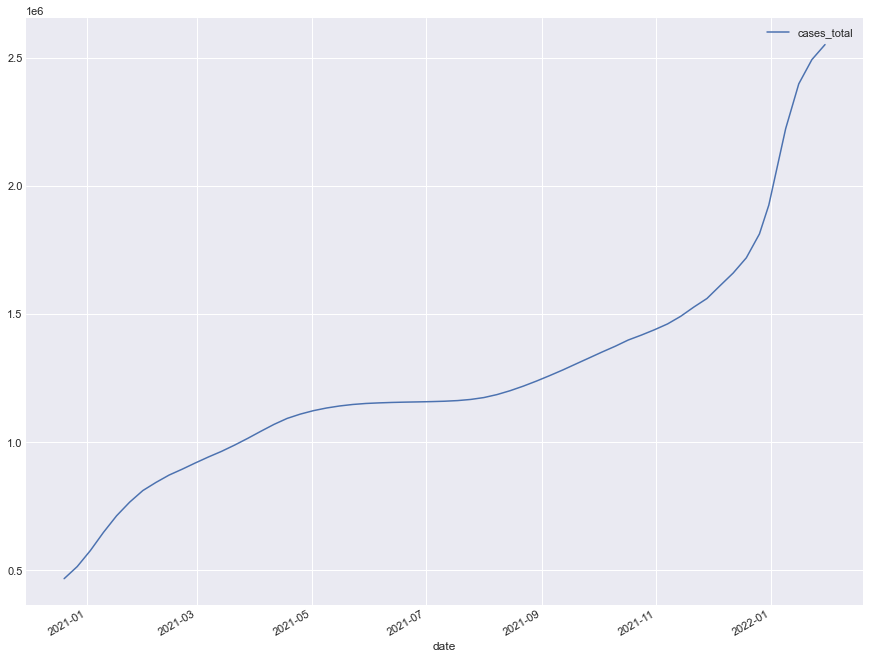

In [161]:
df_hvc[df_hvc['stat_abr']=='NY'].plot( 'date' , 'cases_total' )

<AxesSubplot:xlabel='date'>

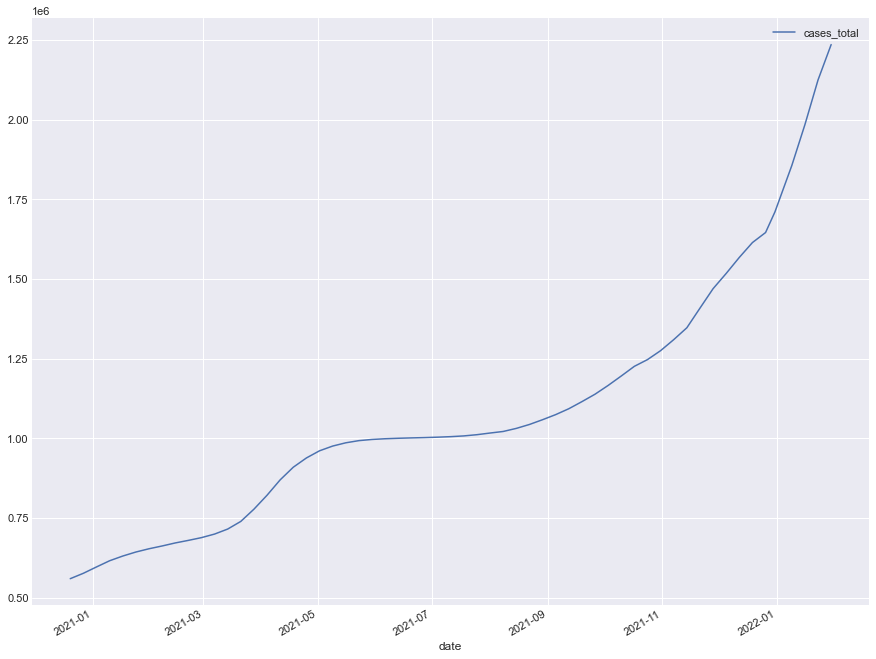

In [162]:
df_hvc[df_hvc['stat_abr']=='MI'].plot( 'date' , 'cases_total' )

<AxesSubplot:xlabel='w_id'>

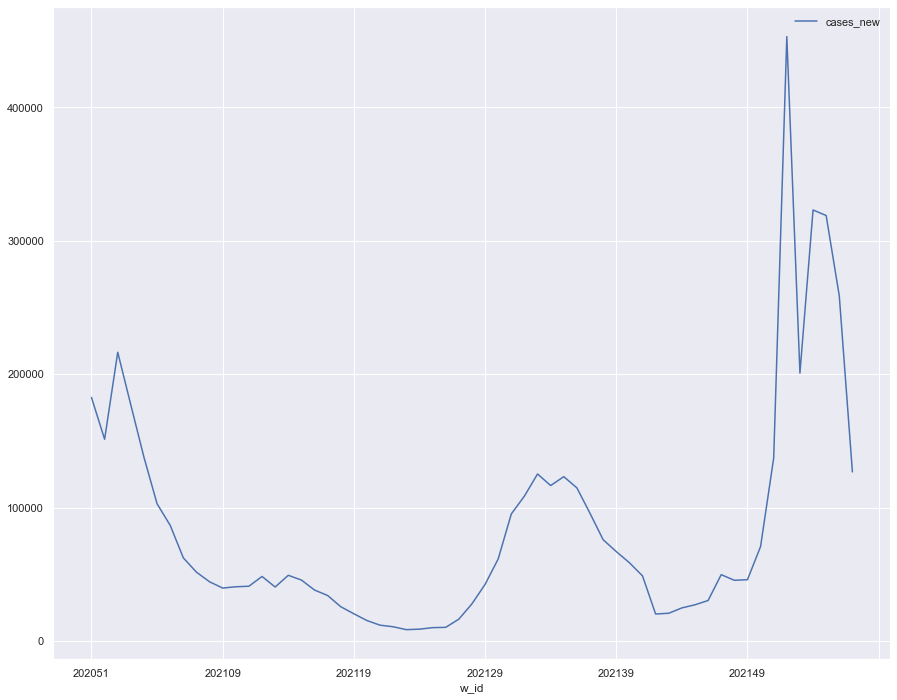

In [217]:
#Unique week identifier genration to group by the week of all state cases
df_hvc["w_id"]=df_hvc['date'].astype(str).str[:4]+df_hvc["week"].astype(str)
df_hvc_sum =df_hvc.groupby('w_id').sum()
df_hvc_sum=df_hvc_sum.reset_index()
df_hvc_sum.plot( 'w_id' , 'cases_new' )

In [165]:
df_state_d=df_state.sort_values(by='cases_total',ascending=False).head(10)
df_state_d=df_state_d.reset_index()
df_state_d

,state,stat_abr,latitude,longitude,uid,date,cases_total,death_total,total_icu,distributed_janssen,...,admin_per_100k,administered_dose1_recip,administered_dose1_pop_pct,series_complete_yes,series_complete_pop_pct,additional_doses,additional_doses_vax_pct,additional_doses_janssen,additional_doses_moderna,additional_doses_pfizer
0,California,CA,37.271875,-119.270415,CA202204,2022-01-30,8213786,78825,62418.0,3649600,...,176876,33979161,86.0,27279094,69.0,12337582.0,45.2,195420.0,5456278.0,6685398.0
1,Texas,TX,31.169336,-100.076842,TX202204,2022-01-30,6192817,78136,54264.0,2586100,...,148537,20201379,69.7,17057356,58.8,5820798.0,34.1,89301.0,2584376.0,3146936.0
2,Florida,FL,27.975728,-83.833017,FL202204,2022-01-30,5556402,66893,46966.0,2319500,...,164546,16573611,77.2,13971855,65.1,5169202.0,37.0,95198.0,2254445.0,2814534.0
3,Illinois,IL,39.739318,-89.504139,IL202204,2022-01-30,2897174,34439,24462.0,1153500,...,167471,9536871,75.3,8378684,66.1,3947067.0,47.1,48984.0,1649257.0,2247605.0
4,Pennsylvania,PA,40.994593,-77.604698,PA202204,2022-01-30,2656587,40563,26806.0,1494500,...,168379,10865741,84.9,8414473,65.7,3338215.0,39.7,55225.0,1477144.0,1805797.0
5,Ohio,OH,40.190362,-82.669252,OH202204,2022-01-30,2576245,33071,29243.0,963900,...,144619,7284830,62.3,6636584,56.8,3259713.0,49.1,55482.0,1400839.0,1802822.0
6,New York,NY,40.705626,-73.979680,NY202204,2022-01-30,2550713,25882,40236.0,1837000,...,188587,17033103,87.6,14416516,74.1,5866217.0,40.7,99469.0,2564126.0,3202293.0
7,North Carolina,NC,35.214563,-79.891267,NC202204,2022-01-30,2426999,21132,17346.0,909300,...,149891,8475190,80.8,6124645,58.4,1466862.0,24.0,25838.0,647427.0,793580.0
8,Georgia,GA,32.678125,-83.222976,GA202204,2022-01-30,2346518,32868,19930.0,808800,...,131987,6755902,63.6,5609172,52.8,1874258.0,33.4,22319.0,846207.0,1004542.0
9,Michigan,MI,44.943560,-86.415805,MI202204,2022-01-30,2235180,32197,18745.0,921200,...,147283,6508993,65.2,5811233,58.2,2807230.0,48.3,44591.0,1228361.0,1534192.0


In [167]:
#Getting top 10 States with COVID Deaths
df_d_sumstatedsc=df_state.sort_values(by='death_total',ascending=False).head(10)
df_d_sumstatedsc=df_d_sumstatedsc.reset_index()
df_d_sumstatedsc

,state,stat_abr,latitude,longitude,uid,date,cases_total,death_total,total_icu,distributed_janssen,...,admin_per_100k,administered_dose1_recip,administered_dose1_pop_pct,series_complete_yes,series_complete_pop_pct,additional_doses,additional_doses_vax_pct,additional_doses_janssen,additional_doses_moderna,additional_doses_pfizer
0,California,CA,37.271875,-119.270415,CA202204,2022-01-30,8213786,78825,62418.0,3649600,...,176876,33979161,86.0,27279094,69.0,12337582.0,45.2,195420.0,5456278.0,6685398.0
1,Texas,TX,31.169336,-100.076842,TX202204,2022-01-30,6192817,78136,54264.0,2586100,...,148537,20201379,69.7,17057356,58.8,5820798.0,34.1,89301.0,2584376.0,3146936.0
2,Florida,FL,27.975728,-83.833017,FL202204,2022-01-30,5556402,66893,46966.0,2319500,...,164546,16573611,77.2,13971855,65.1,5169202.0,37.0,95198.0,2254445.0,2814534.0
3,Pennsylvania,PA,40.994593,-77.604698,PA202204,2022-01-30,2656587,40563,26806.0,1494500,...,168379,10865741,84.9,8414473,65.7,3338215.0,39.7,55225.0,1477144.0,1805797.0
4,Illinois,IL,39.739318,-89.504139,IL202204,2022-01-30,2897174,34439,24462.0,1153500,...,167471,9536871,75.3,8378684,66.1,3947067.0,47.1,48984.0,1649257.0,2247605.0
5,Ohio,OH,40.190362,-82.669252,OH202204,2022-01-30,2576245,33071,29243.0,963900,...,144619,7284830,62.3,6636584,56.8,3259713.0,49.1,55482.0,1400839.0,1802822.0
6,Georgia,GA,32.678125,-83.222976,GA202204,2022-01-30,2346518,32868,19930.0,808800,...,131987,6755902,63.6,5609172,52.8,1874258.0,33.4,22319.0,846207.0,1004542.0
7,Michigan,MI,44.943560,-86.415805,MI202204,2022-01-30,2235180,32197,18745.0,921200,...,147283,6508993,65.2,5811233,58.2,2807230.0,48.3,44591.0,1228361.0,1534192.0
8,New Jersey,NJ,40.143006,-74.731116,NJ202204,2022-01-30,2109783,31412,21440.0,928800,...,180416,7765786,87.4,6451611,72.6,2716238.0,42.1,56369.0,1187194.0,1472632.0
9,Arizona,AZ,34.168219,-111.930907,AZ202204,2022-01-30,1858385,26206,16097.0,600600,...,153439,5101621,70.1,4279319,58.8,1593658.0,37.2,20858.0,707090.0,864911.0


C:\Users\Surya\AppData\Local\Temp/ipykernel_4492/153429945.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


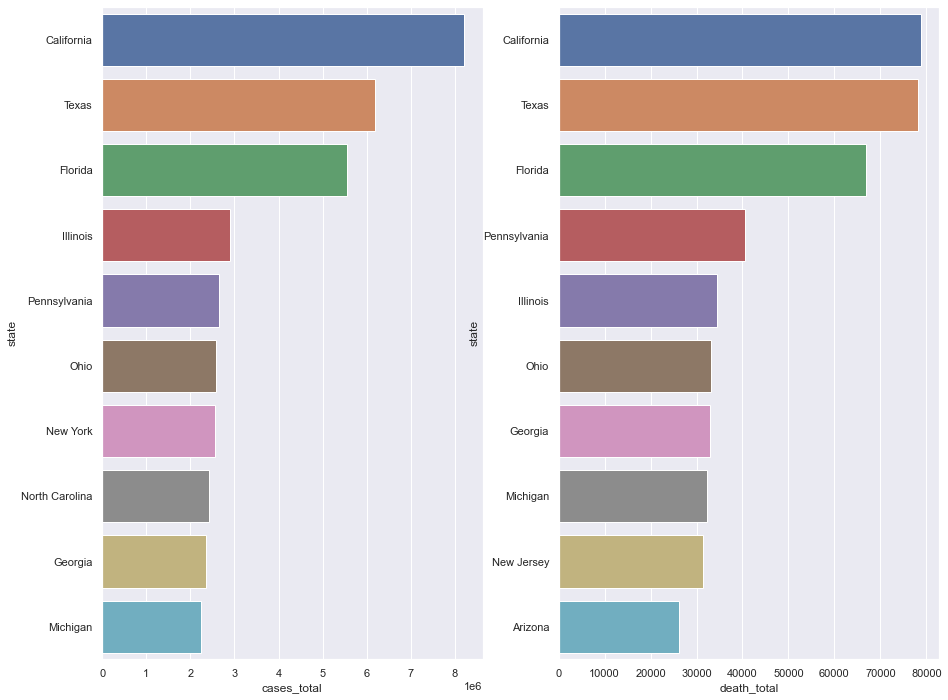

In [168]:
sns.set(rc={'figure.figsize':(15,12)})
fig, ax =plt.subplots(1,2)
sns.barplot(y ='state',x = 'cases_total',data = df_state_d, ax=ax[0])
sns.barplot(y ='state',x = 'death_total',data = df_d_sumstatedsc, ax=ax[1])
fig.show()

<AxesSubplot:xlabel='date'>

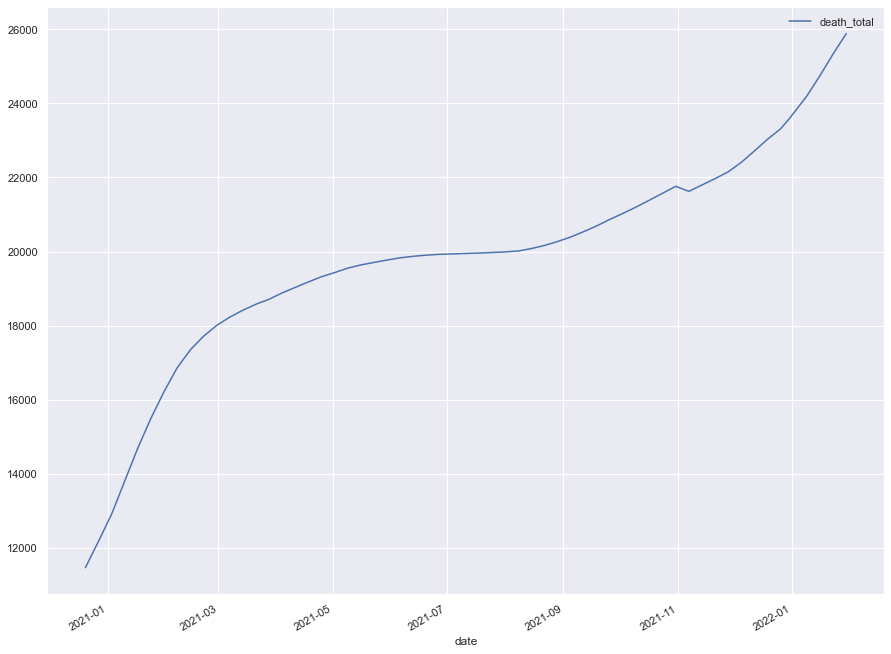

In [176]:
df_hvc[df_hvc['stat_abr']=='NY'].plot( 'date' , 'death_total' )

<AxesSubplot:xlabel='date'>

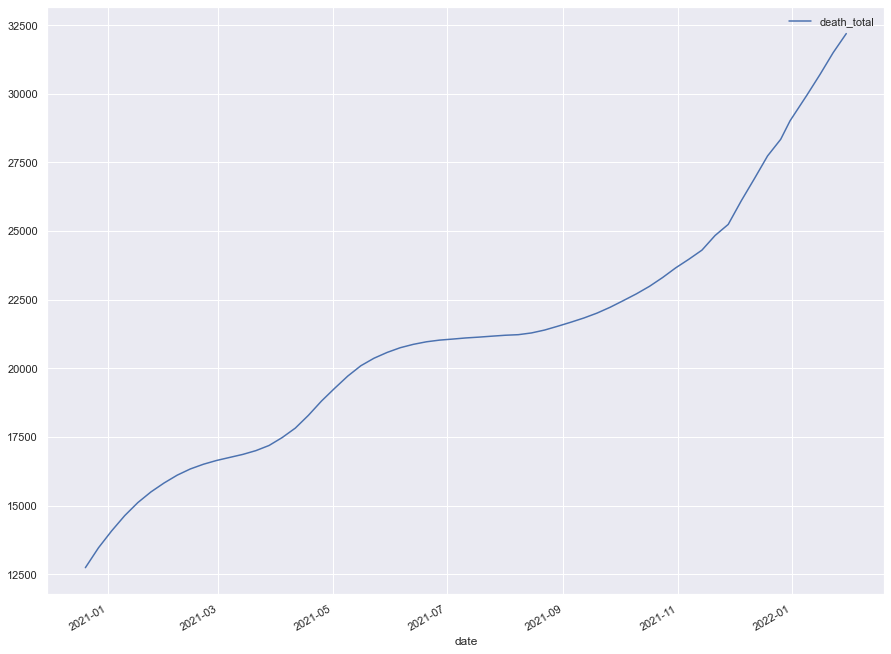

In [178]:
df_hvc[df_hvc['stat_abr']=='MI'].plot( 'date' , 'death_total' )

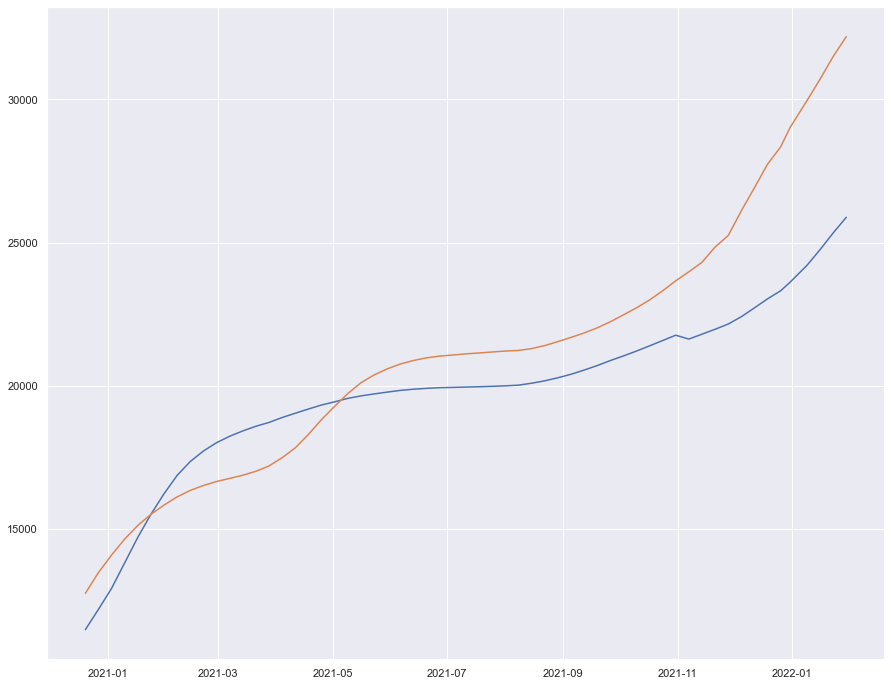

In [180]:
y1=df_hvc[df_hvc['stat_abr']=='NY']['death_total']
y2=df_hvc[df_hvc['stat_abr']=='MI']['death_total']
x=df_hvc[df_hvc['stat_abr']=='NC']['date']

plt.plot(x, y1)
plt.plot(x, y2)


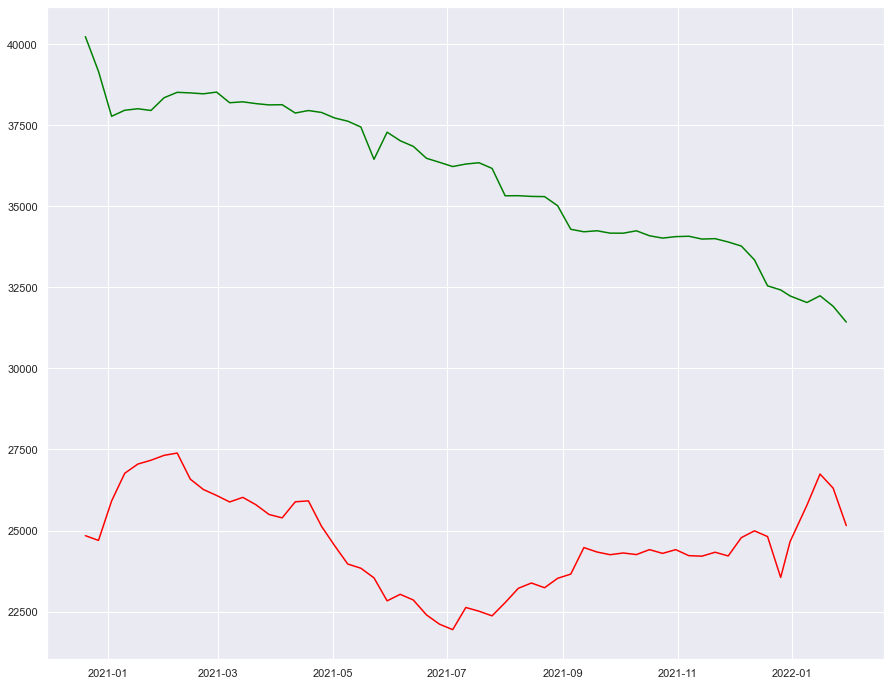

In [247]:
y1=df_hvc[df_hvc['stat_abr']=='NY']['total_icu']
y2=df_hvc[df_hvc['stat_abr']=='NY']['occupied_icu']
x=df_hvc[df_hvc['stat_abr']=='NC']['date']

plt.plot(x, y1, color='green')
plt.plot(x, y2,color='red')


In [225]:
y1=df_hvc[df_hvc['stat_abr']=='CA']['series_complete_janssen']
y2=df_hvc[df_hvc['stat_abr']=='CA']['series_complete_pfizer']
y3=df_hvc[df_hvc['stat_abr']=='CA']['series_complete_moderna']
x=df_hvc[df_hvc['stat_abr']=='CA']['date']

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

AttributeError: 'numpy.ndarray' object has no attribute 'legend'

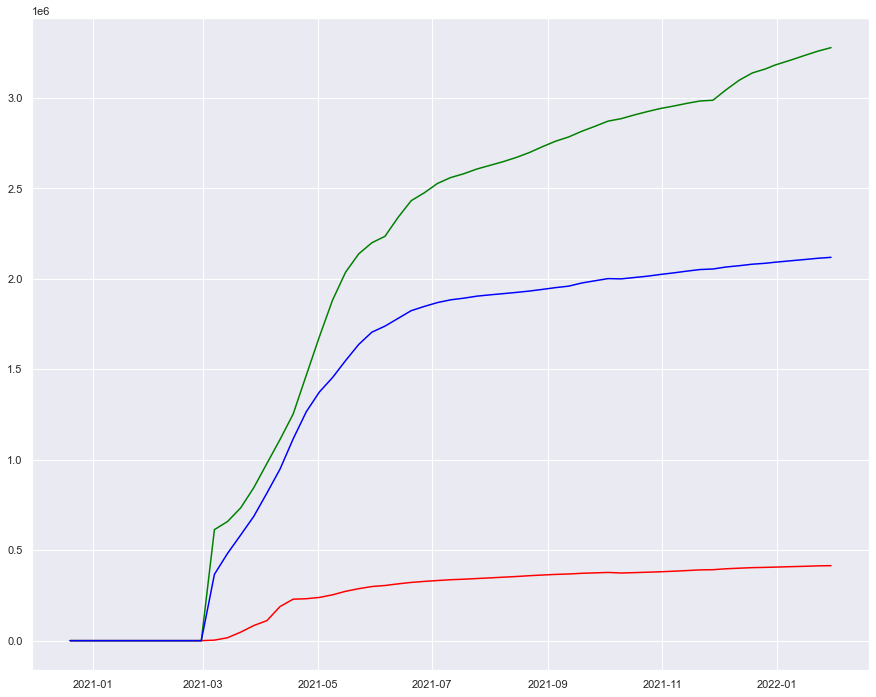

In [229]:
y1=df_hvc[df_hvc['stat_abr']=='MI']['series_complete_janssen']
y2=df_hvc[df_hvc['stat_abr']=='MI']['series_complete_pfizer']
y3=df_hvc[df_hvc['stat_abr']=='MI']['series_complete_moderna']
x=df_hvc[df_hvc['stat_abr']=='CA']['date']

plt.plot(x, y1,color="red")
plt.plot(x, y2,color="green")
plt.plot(x, y3,color="blue")

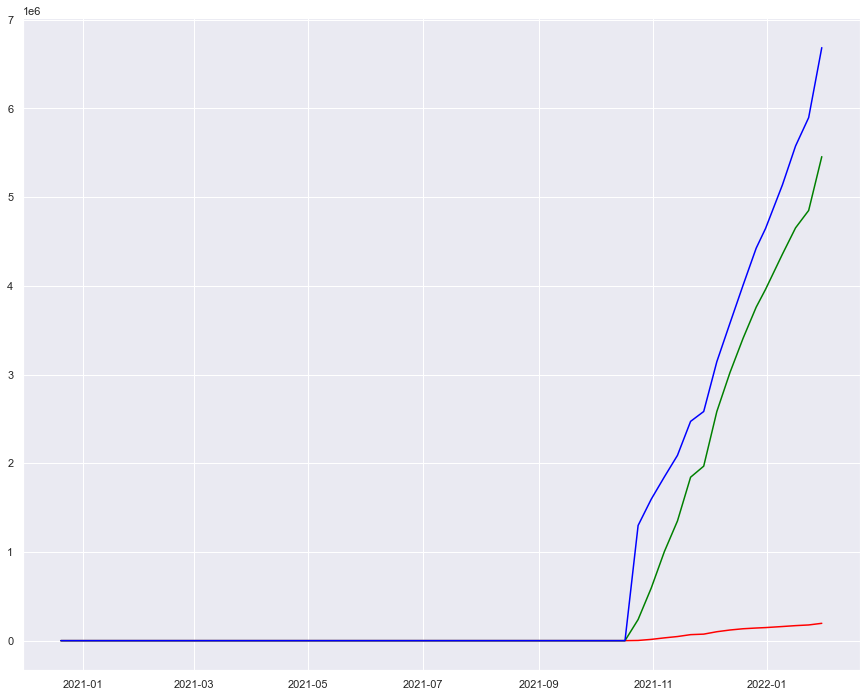

In [230]:
y1=df_hvc[df_hvc['stat_abr']=='CA']['additional_doses_janssen']
y2=df_hvc[df_hvc['stat_abr']=='CA']['additional_doses_moderna']
y3=df_hvc[df_hvc['stat_abr']=='CA']['additional_doses_pfizer']
x=df_hvc[df_hvc['stat_abr']=='CA']['date']

plt.plot(x, y1,color="red")
plt.plot(x, y2,color="green")
plt.plot(x, y3,color="blue")

In [102]:
df_hvc.columns

Index(['stat_abr', 'uid', 'date', 'mmwr_week', 'week', 'cases_total',
       'cases_new', 'death_total', 'death_new', 'occupied_icu', 'total_icu',
       'distributed_janssen', 'series_complete_janssen', 'distributed_moderna',
       'series_complete_moderna', 'distributed_pfizer',
       'series_complete_pfizer', 'distributed', 'dist_per_100k',
       'administered', 'admin_per_100k', 'administered_dose1_recip',
       'administered_dose1_pop_pct', 'series_complete_yes',
       'series_complete_pop_pct', 'additional_doses',
       'additional_doses_vax_pct', 'additional_doses_janssen',
       'additional_doses_moderna', 'additional_doses_pfizer', 'w_id'],
      dtype='object')

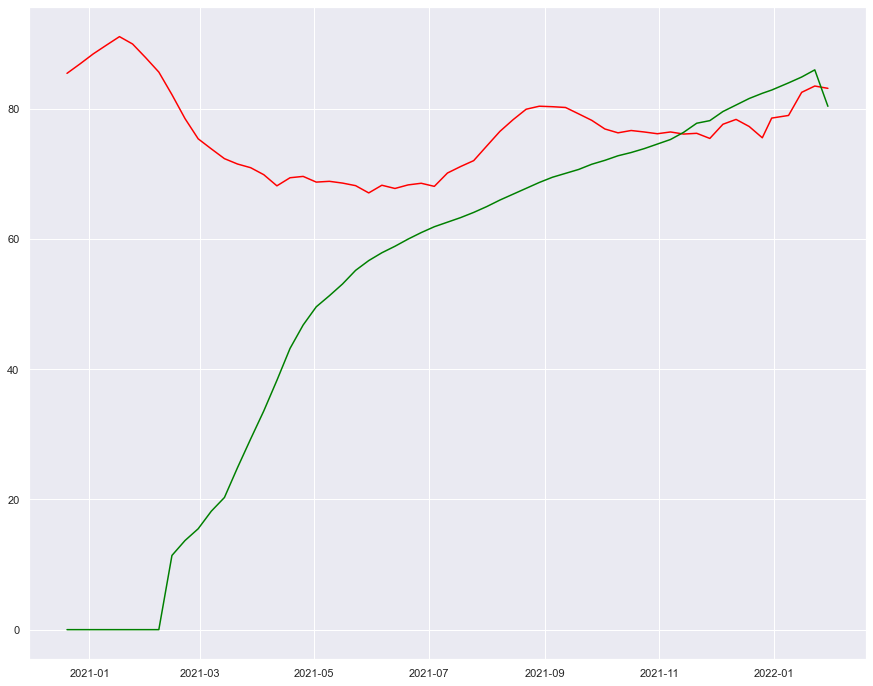

In [249]:
df_hvc['pct_icu_occ']=(df_hvc['occupied_icu']/df_hvc['total_icu'])*100
y1=df_hvc[df_hvc['stat_abr']=='CA']['pct_icu_occ']
y2=df_hvc[df_hvc['stat_abr']=='CA']['administered_dose1_pop_pct']
#y3=df_hvc[df_hvc['stat_abr']=='CA']['additional_doses_pfizer']
x=df_hvc[df_hvc['stat_abr']=='CA']['date']

plt.plot(x, y1,color='red')
plt.plot(x, y2,color='green')
#plt.plot(x, y3)

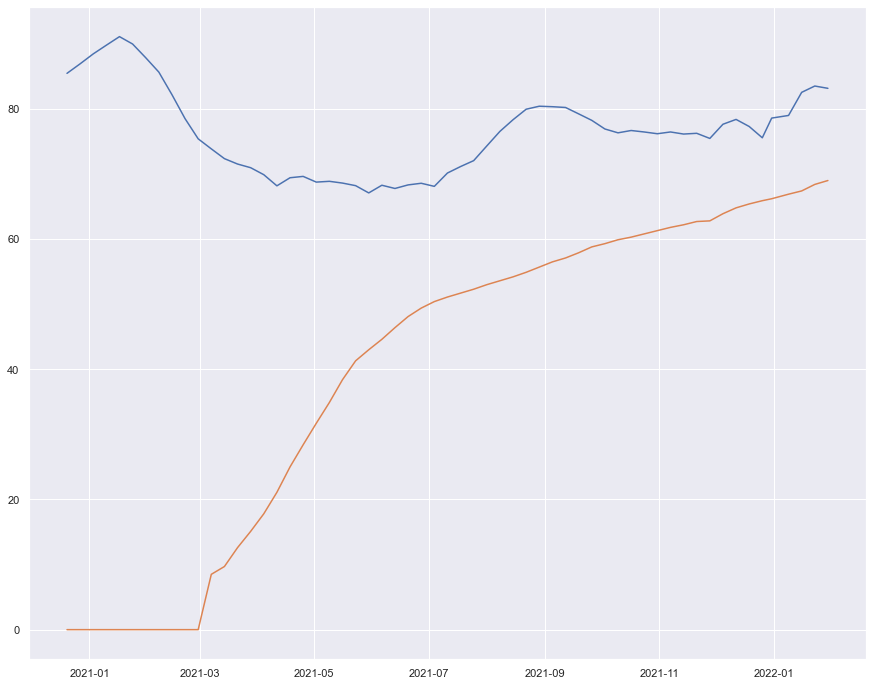

In [104]:
df_hvc['pct_icu_occ']=(df_hvc['occupied_icu']/df_hvc['total_icu'])*100
y1=df_hvc[df_hvc['stat_abr']=='CA']['pct_icu_occ']
y2=df_hvc[df_hvc['stat_abr']=='CA']['series_complete_pop_pct']
#y3=df_hvc[df_hvc['stat_abr']=='CA']['additional_doses_pfizer']
x=df_hvc[df_hvc['stat_abr']=='CA']['date']

plt.plot(x, y1)
plt.plot(x, y2)
#plt.plot(x, y3)

<AxesSubplot:xlabel='date'>

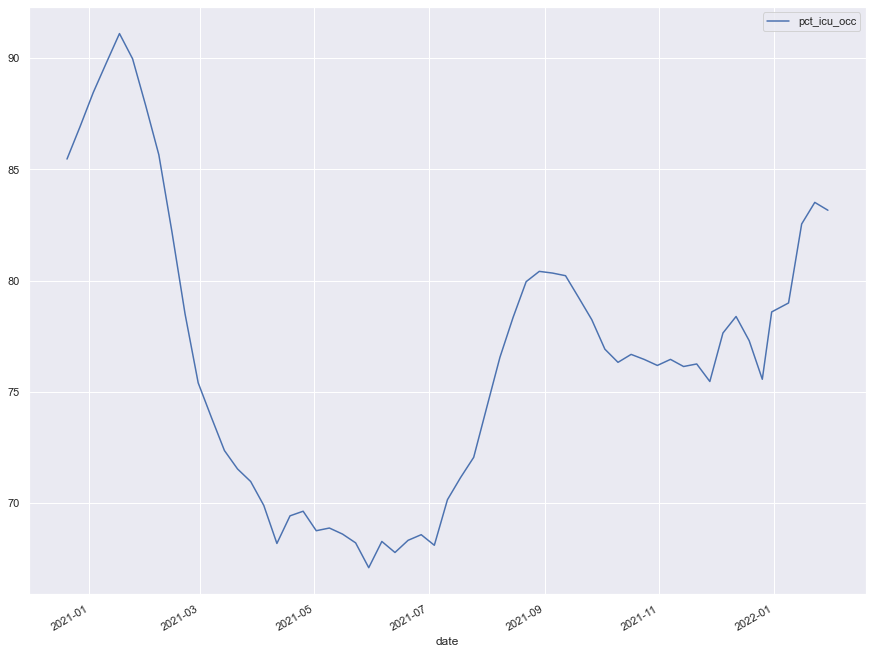

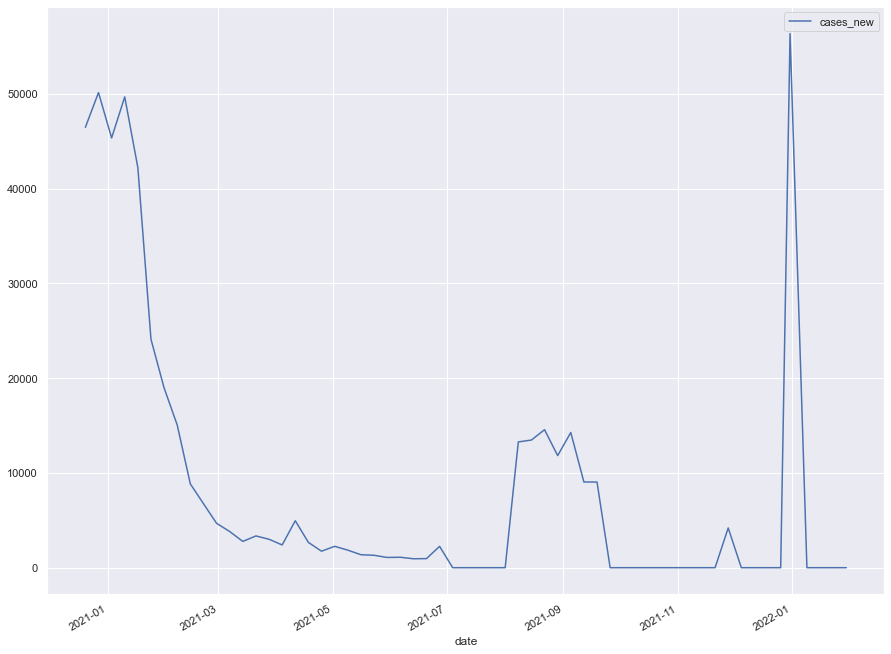

In [105]:
df_hvc[df_hvc['stat_abr']=='CA'].plot( 'date' , 'pct_icu_occ' )
df_hvc[df_hvc['stat_abr']=='CA'].plot( 'date' , 'cases_new' )

<AxesSubplot:ylabel='death_total'>

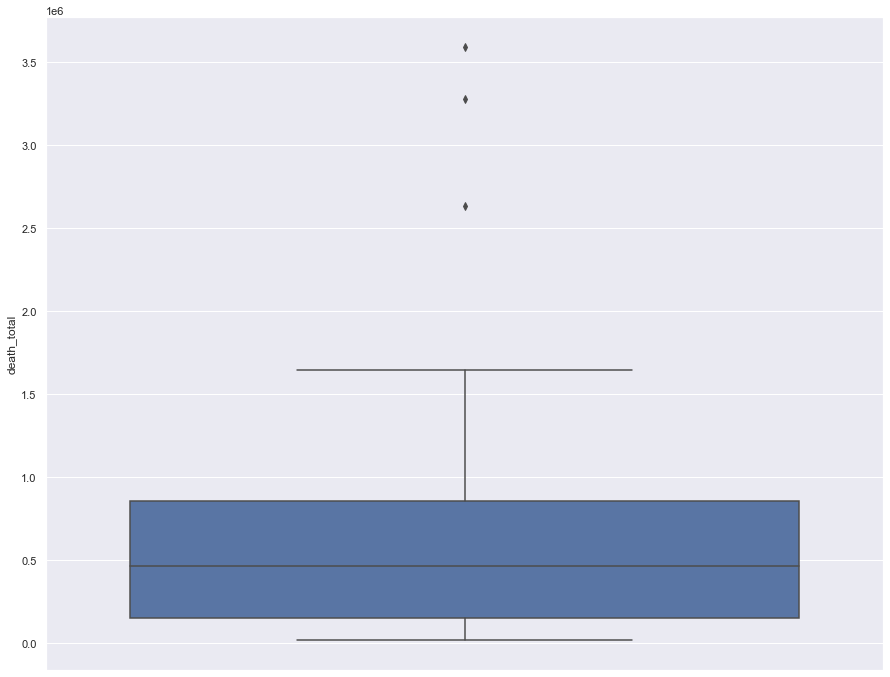

In [106]:
sns.boxplot( y=df_state["death_total"] )

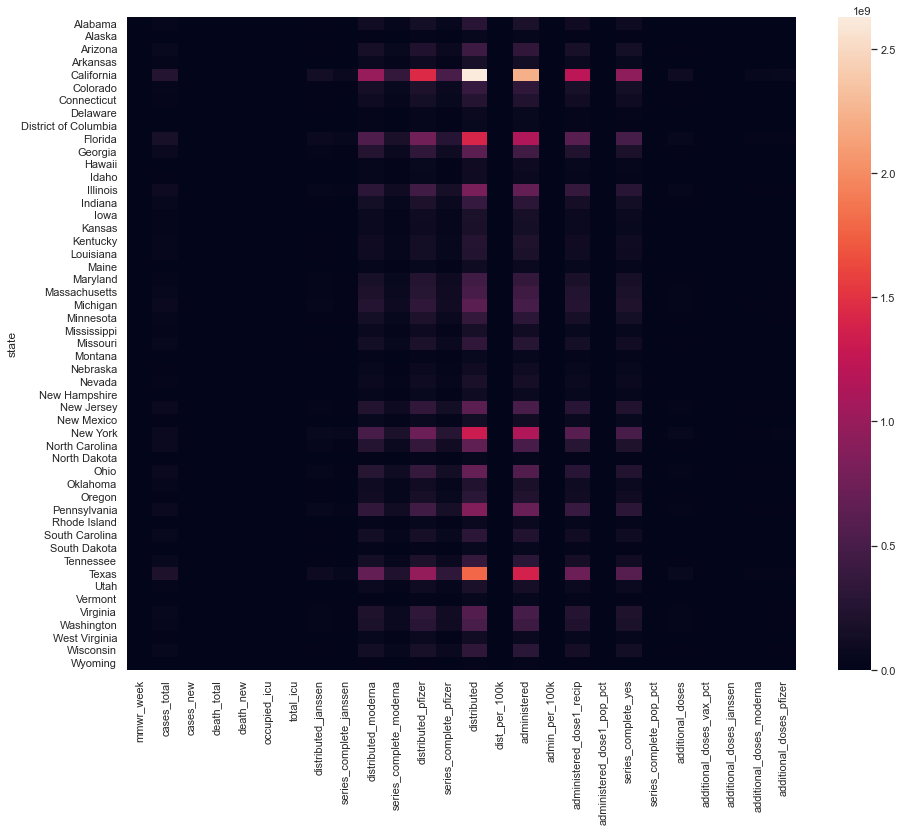

In [107]:
p1 = sns.heatmap(df_state)

C:\Users\Surya\AppData\Local\Temp/ipykernel_4492/1411144688.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


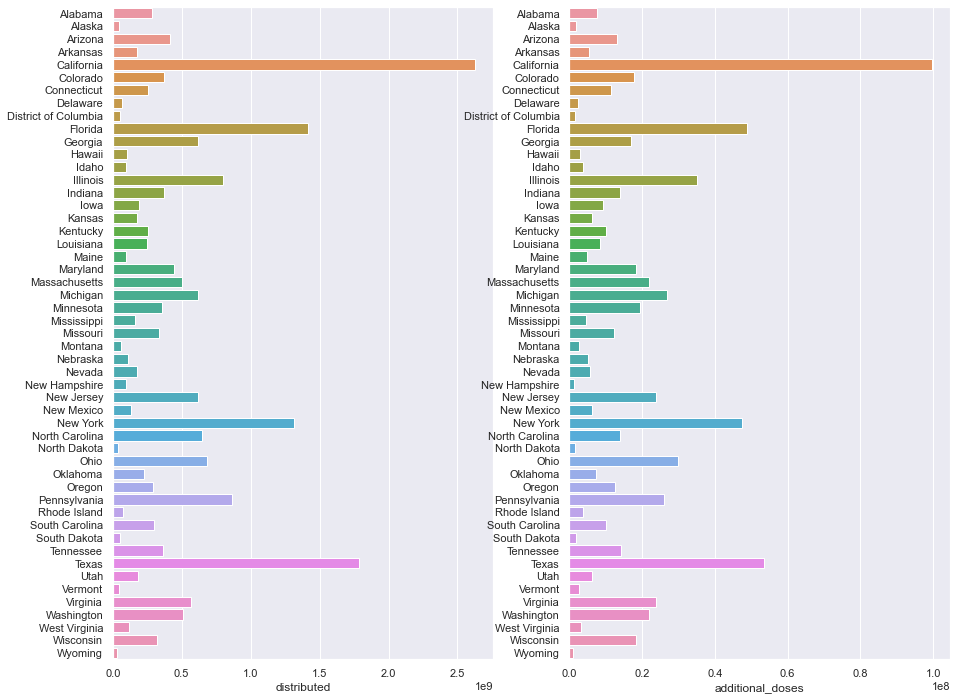

In [108]:
sns.set(rc={'figure.figsize':(15,12)})
fig, ax =plt.subplots(1,2)
sns.barplot(y =df_state.index.values, x = 'distributed',data = df_state, ax=ax[0])
sns.barplot(y =df_state.index.values, x = 'additional_doses',data = df_state, ax=ax[1])
fig.show()

C:\Users\Surya\AppData\Local\Temp/ipykernel_4492/1730869318.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


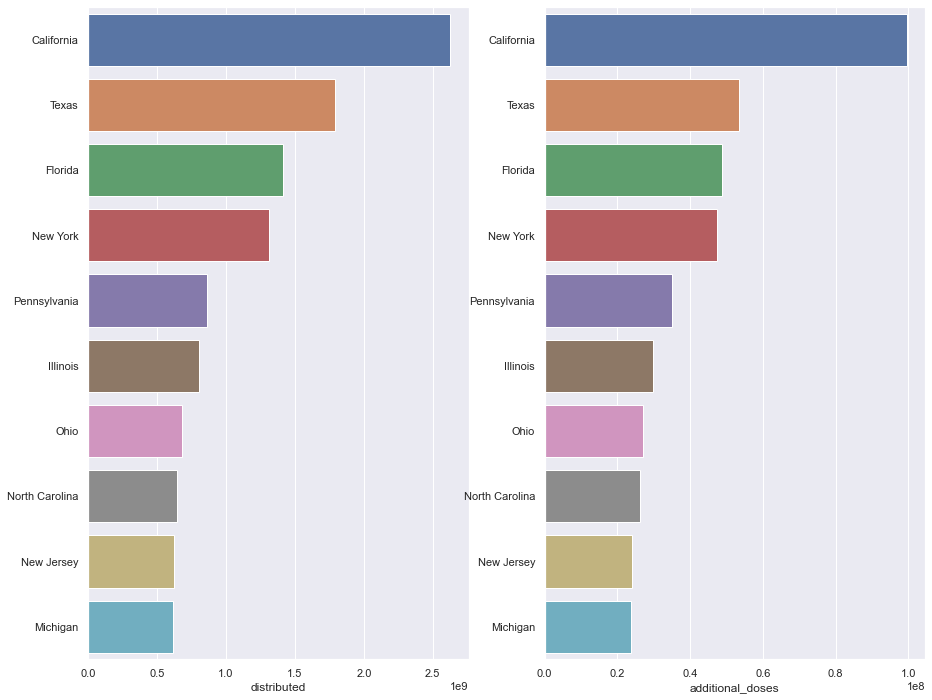

In [109]:
#Getting top 10 States with COVID Deaths
df_d_sumstatedsc=df_state.sort_values(by='distributed',ascending=False).head(10)
df_d_sumstatedsc1=df_state.sort_values(by='additional_doses',ascending=False).head(10)


sns.set(rc={'figure.figsize':(15,12)})
fig, ax =plt.subplots(1,2)
sns.barplot(y =df_d_sumstatedsc.index.values, x = 'distributed',data = df_d_sumstatedsc, ax=ax[0])
sns.barplot(y =df_d_sumstatedsc.index.values, x = 'additional_doses',data = df_d_sumstatedsc1, ax=ax[1])
fig.show()

C:\Users\Surya\AppData\Local\Temp/ipykernel_4492/1411144688.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


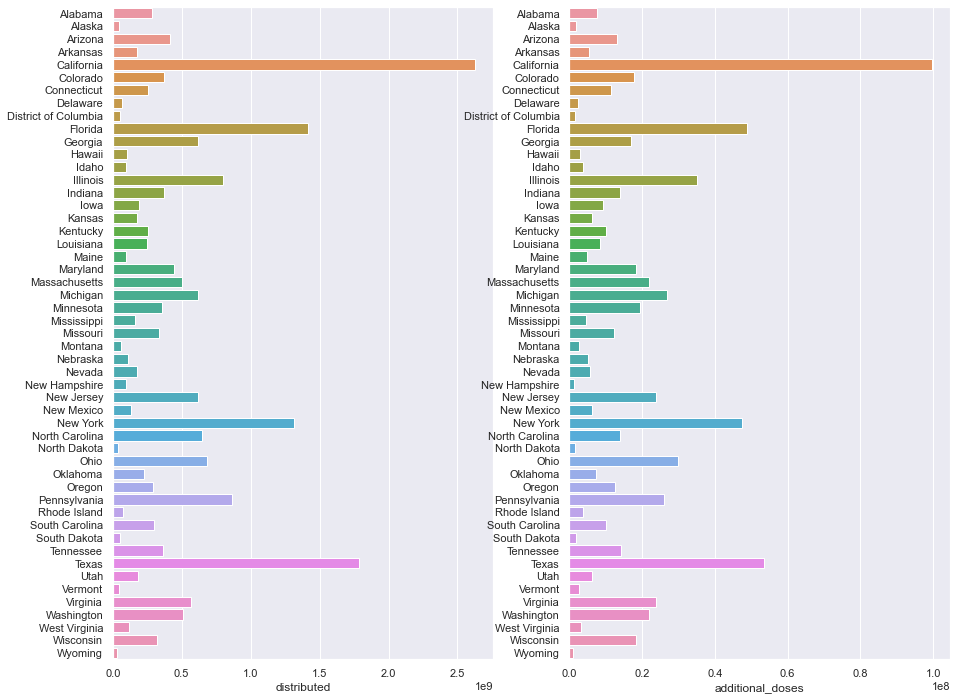

In [110]:
sns.set(rc={'figure.figsize':(15,12)})
fig, ax =plt.subplots(1,2)
sns.barplot(y =df_state.index.values, x = 'distributed',data = df_state, ax=ax[0])
sns.barplot(y =df_state.index.values, x = 'additional_doses',data = df_state, ax=ax[1])
fig.show()

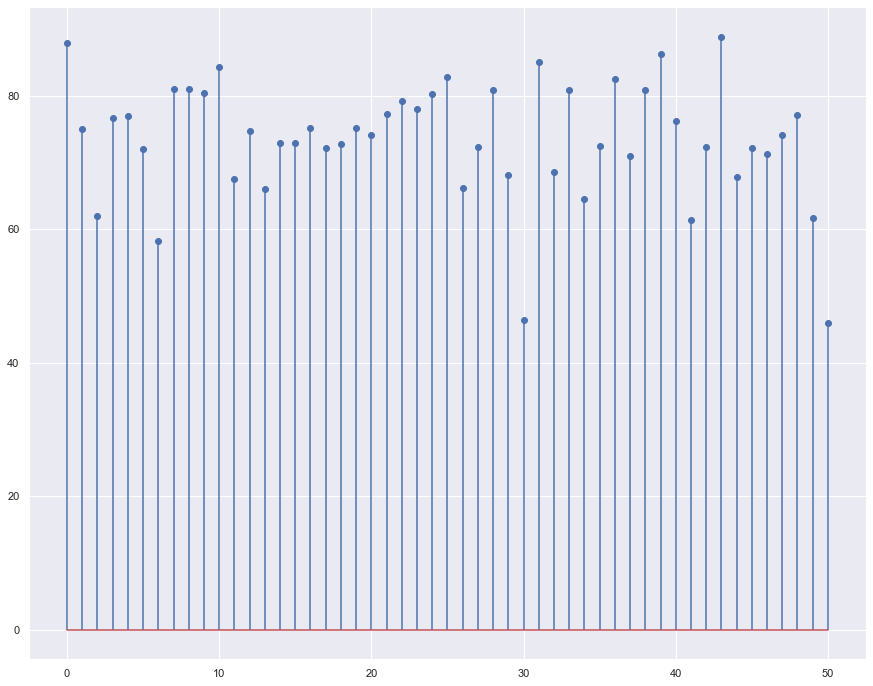

In [111]:
df_state['pct_icu_occ']=(df_state['occupied_icu']/df_state['total_icu'])*100

plt.stem(df_state['pct_icu_occ'])
plt.show()

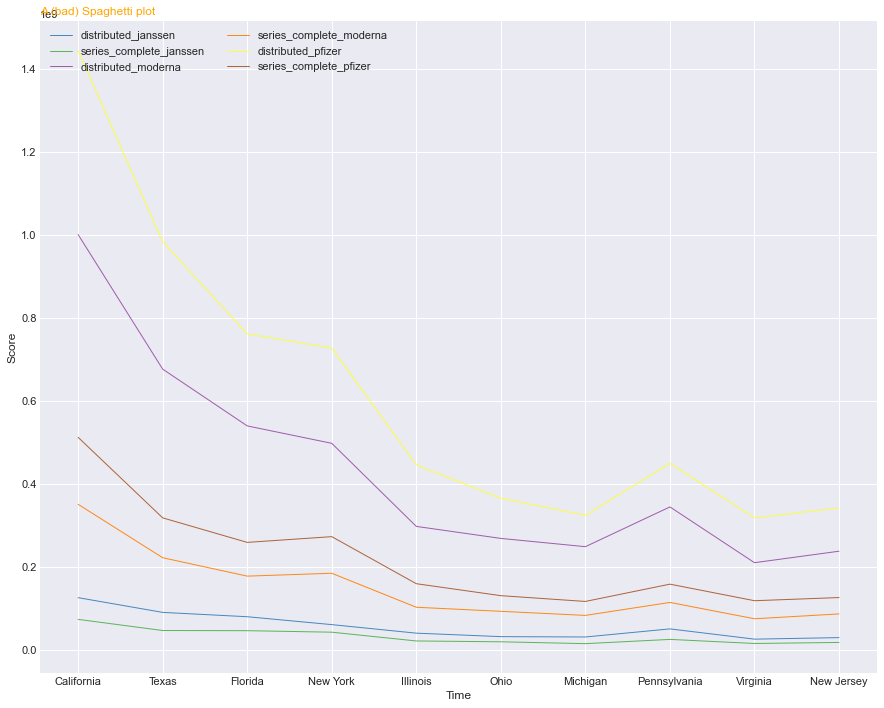

In [112]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')
df_state
df_state_d=df_state.reset_index()
df_state_d=df_state_d.sort_values(by='additional_doses',ascending=False).head(10)
df_state_d=df_state_d[['state','distributed_janssen',
       'series_complete_janssen', 'distributed_moderna',
       'series_complete_moderna', 'distributed_pfizer',
       'series_complete_pfizer']]
x='state'
 
# Plot multiple lines
num=0
for column in df_state_d.drop(x, axis=1):
    num+=1
    plt.plot(df_state_d[x], df_state_d[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("A (bad) Spaghetti plot", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Score")

# Show the graph
plt.show()

In [113]:
df_state.columns

Index(['mmwr_week', 'cases_total', 'cases_new', 'death_total', 'death_new',
       'occupied_icu', 'total_icu', 'distributed_janssen',
       'series_complete_janssen', 'distributed_moderna',
       'series_complete_moderna', 'distributed_pfizer',
       'series_complete_pfizer', 'distributed', 'dist_per_100k',
       'administered', 'admin_per_100k', 'administered_dose1_recip',
       'administered_dose1_pop_pct', 'series_complete_yes',
       'series_complete_pop_pct', 'additional_doses',
       'additional_doses_vax_pct', 'additional_doses_janssen',
       'additional_doses_moderna', 'additional_doses_pfizer', 'pct_icu_occ'],
      dtype='object')